In [1]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 4.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [3]:
np.random.seed(42)

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style='whitegrid')

pd.set_option('display.max_rows', None)

# Ames House Price Prediction: Domain-driven EDA

<img style="margin-left: 0; margin-bottom: 20px" width="600px" src="https://livability.com/sites/default/files/151SUBAME031.jpg" />

<p>
In this notebook, we will explore factores that impacted sale price of houses in Ames, Iowa. <br/>
The goal is to make sense of provided dataset and turn these insights into actions during <a href="https://www.kaggle.com/glushko/house-prices-regression-modelling-part-ii">the second modelling part</a>. <br/>
Apart from that, we will try to describe the analysis in the <strong>domain-driven</strong> way and spend some time understanding meaning of features in the real estate field.
</p>

<strong>Don't hesitate to upvote this notebook if you find it useful 💫</strong>

In [4]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

full_df = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

## Dataset Overview

Given dataset has:
* a vast number of features (**80**)
* a relatively small number of training examples (**2918**)

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

### House Features Overview

It's easy to get lost reviewing the list of available information. So we probably would like to group features somehow meaningfully.

* **House Properties**
    * Construction Date [YearBuilt]
    * Remodeling Date [YearRemodAdd]
    * Dwelling Class [BldgType] and Subclass [MSSubClass]
    * House Style [HouseStyle]
    * Area (sq. feets) [LotArea]
    * Shape [LotShape]
    * Flatness [LandContour] and slope [LandSlope]
    * Overral Material and Finish Quality Rate [OverallQual]
    * Overral Condition Rate [OverallCond]
    * Home Functionality [Functional]
* **Living Area**
    * Living Area Above Ground [GrLivArea]
    * Low finished living area [LowQualFinSF]
    * Total Rooms above grade (w/o bathrooms) [TotRmsAbvGrd]
    * First Floor Area [1stFlrSF]
    * Second Floor Area [2ndFlrSF]
    * Bedrooms above grade (w/o basement bedrooms) [BedroomAbvGr]
* **Kitchen**
    * Kitchen Above Grade [KitchenAbvGr]
    * Kitchen Quality [KitchenQual]
* **Bathroom**
    * Basement Full Bathroom [BsmtFullBath]
    * Basement Half Bathroom [BsmtHalfBath]
    * Full bathroom above grade [FullBath]
    * Half bathroom above grade [HalfBath]
* **Systems**
    * Heating Type [Heating]
    * Heating Quality and Condition Rate [HeatingQC]
    * Has Central Air Conditioning? [CentralAir]
    * Electrical System Type [Electrical]
    * Utilities (Gas, water, septic) [Utilities]
* **Fireplaces**
    * Number of fireplaces [Fireplaces]
    * Fireplace Quality [FireplaceQu]
* **Basement**
    * Foundation Type (stone, wood, etc) [Foundation]
    * Basement Quality [BsmtQual]
    * Basement Condition [BsmtCond]
    * Basement Exposure [BsmtExposure]
    * Basement finished area rating (1 or 2) [BsmtFinType1][BsmtFinType2]
    * Basement Finished area (1 or 2) [BsmtFinSF1] [BsmtFinSF2]
    * Basement Unfinished Area [BsmtUnfSF]
    * Total Basement Area [TotalBsmtSF]
* **Roof Properties**
    * Roof Style [RoofStyle]
    * Roof Material [RoofMatl]
* **Exterior**
    * Exterior Covering (1 or 2 materials) [Exterior1st] [Exterior2nd]
    * Exterior Material Quality [ExterQual]
    * Exterior Material Condition [ExterCond]
* **Masonry veneer**
    * Masonry Veneer Type [MasVnrType]
    * Masonry Veneer Area [MasVnrArea]
* **Garage**
    * Garage Type [GarageType]
    * Year Garage was built [GarageYrBlt]
    * Interior Finish of the garage [GarageFinish]
    * Garage Size (in cars) [GarageCars]
    * Garage Area [GarageArea]
    * Garage Quality [GarageQual]
    * Garage Condition [GarageCond]
* **Fence** [Fence]
* **Porch**
    * Wood Deck Area [WoodDeckSF]
    * Open Porch Area (in sq ft) [OpenPorchSF]
    * Enclosed Porch Area [EnclosedPorch]
    * 3 seasons porch area [3SsnPorch]
    * Screen Porch area [ScreenPorch]
* **Pool**
    * Pool area [PoolArea]
    * Pool Quality [PoolQC]
* **House Access**
    * Road Access [Street] [LotFrontage]
    * Alley Access [Alley]
    * House Road Connection [LotFrontage]
    * Paved driveway (paved, dirt, etc) [PavedDrive]
* **House Location**
    * Neighborhood (Physical Location) [Neighborhood]
    * Zoning classification [MSZoning]
    * Location Conditions (1 or 2) [Condition1][Condition2]
    * Place where house is located in neighborhood (like an inside or a corner lot) [LotConfig]
* **Miscellaneous Features** (elevator, 2nd garage, etc) [MiscFeature]
    * Miscellaneous Features Value in $ [MiscVal]
* **Sale Information**
    * Month Sold [MM]
    * Year Sold [YYYY]
    * Sale Type (Warranty Deed, new, etc) [SaleType]
    * Sale Condition (family sale, normal sale, etc) [SaleCondition]

With this number of features, we would like to quickly separate them into two groups by type: **numerical** and **categorical features**. This may be handy further during data exploration.

In [6]:
for dataframe in [train_df, test_df, full_df]:
    dataframe['MSSubClass'] = dataframe['MSSubClass'].apply(str)
    dataframe['YrSold'] = dataframe['YrSold'].astype(str)
    dataframe['MoSold'] = dataframe['MoSold'].astype(str)

In [7]:
num_features = [f for f in full_df.columns if full_df.dtypes[f] != 'object']
num_features.remove('Id')
num_features.remove('SalePrice')

cat_features = [f for f in full_df.columns if full_df.dtypes[f] == 'object']

### Missing Values

Let's check missing information in our dataset:

In [8]:
missing_df = full_df.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)
missing_df.drop(['SalePrice'], inplace=True)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate'] = (missing_df['missing_count'] / len(full_df)) * 100

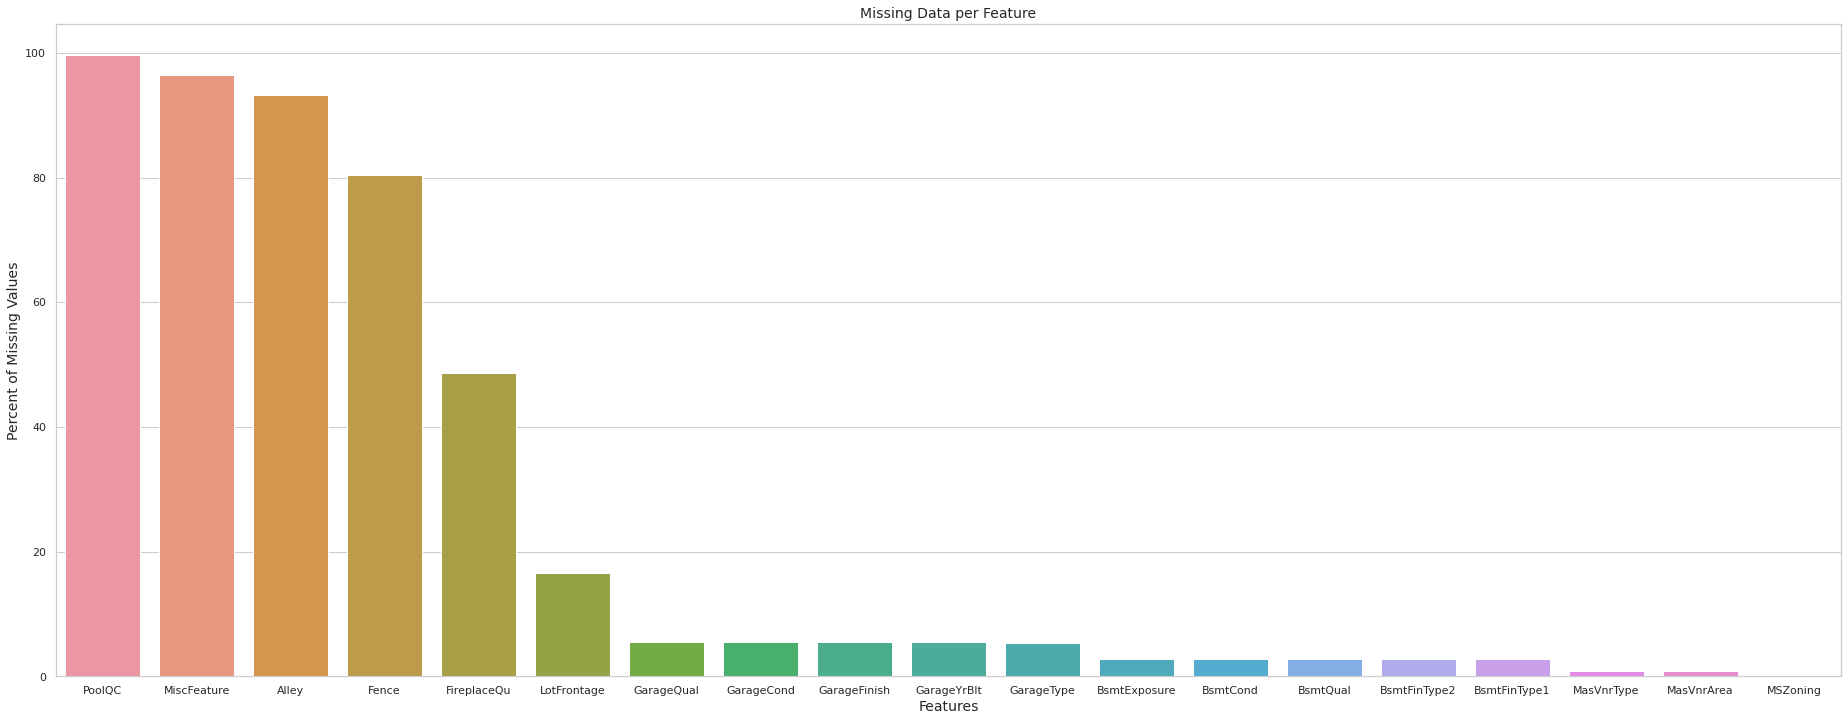

In [9]:
top_five_missing_df = missing_df[missing_df['missing_count'] > 3]

plt.figure(figsize=(32, 12))
sns.barplot(x=top_five_missing_df.index, y='missing_rate', data=top_five_missing_df)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percent of Missing Values', fontsize=14)
plt.title('Missing Data per Feature', fontsize=14);

In [10]:
missing_df

missing_count  missing_rate
PoolQC                 2909     99.657417
MiscFeature            2814     96.402878
Alley                  2721     93.216855
Fence                  2348     80.438506
FireplaceQu            1420     48.646797
LotFrontage             486     16.649538
GarageQual              159      5.447071
GarageCond              159      5.447071
GarageFinish            159      5.447071
GarageYrBlt             159      5.447071
GarageType              157      5.378554
BsmtExposure             82      2.809181
BsmtCond                 82      2.809181
BsmtQual                 81      2.774923
BsmtFinType2             80      2.740665
BsmtFinType1             79      2.706406
MasVnrType               24      0.822199
MasVnrArea               23      0.787941
MSZoning                  4      0.137033
BsmtFullBath              2      0.068517
BsmtHalfBath              2      0.068517
Utilities                 2      0.068517
Functional                2      0.068517
Electrical                1      0.034258
BsmtUnfSF                 1      0.034258
Exterior1st               1      0.034258
Exterior2nd               1      0.034258
TotalBsmtSF               1      0.034258
GarageCars                1      0.034258
BsmtFinSF2                1      0.034258
BsmtFinSF1                1      0.034258
KitchenQual               1      0.034258
SaleType                  1      0.034258
GarageArea                1      0.034258

There are **34** features that are affected by missing values. Let's review them:
* **FireplaceQu**, **Garage{X}**, **Alley**, **PoolQC**, **Bsmt{X}**, **MasVnr{X}**, **Fence** - we can assume that these features were not applicable to all samples that's why they are missing. It's easy to imagine houses that don't have pools, basements or fireplaces.
* **MiscFeature** is also an optional feature that indicates additional benefits of the lot. It impacts the house sale price by **MiscVal** amount.
* **MSSubClass** - it's hard to assume about house sub class. It could be eigher missing value or untypical house building style. Since we have only one missing value, it's make sense to replace it by mode.
* **MSZoning**, **SaleType**, **Electrical**, **Utilities**, **Exterior{X}**, **KitchenQual** - we can assume these labels are missing
* **Functional** - dataset description suggests to assume missing information as typical ("Typ")

We may impute missing features by some constant value that indicates that feature is not part of a lot:

In [11]:
for feature in (
    'PoolQC', 
    'FireplaceQu', 
    'Alley', 
    'Fence', 
    'MiscFeature', 
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2',
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond',
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2',
    'MasVnrType',
):
    train_df[feature] = train_df[feature].fillna('None')
    full_df[feature] = full_df[feature].fillna('None')

In [12]:
for feature in (
    'BsmtFinSF1', 
    'BsmtFinSF2', 
    'BsmtUnfSF',
    'TotalBsmtSF', 
    'BsmtFullBath', 
    'BsmtHalfBath',
    'MasVnrArea',
    'GarageCars',
    'GarageArea',
    'GarageYrBlt',
):
    train_df[feature] = train_df[feature].fillna(0)
    full_df[feature] = full_df[feature].fillna(0)

Features that we assumed missing, they can be impute by the most common values:

In [13]:
for feature in (
    'Electrical', 
    'KitchenQual', 
    'Exterior1st',
    'Exterior2nd', 
    'SaleType',
    'Utilities',
):
    train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])
    full_df[feature] = full_df[feature].fillna(full_df[feature].mode()[0])

**LotFrontage** has ~17% of missing information. This feature may be helpful, so let's try to fill it. 

Frontage and lot area is a subject of regulations, hence it may depends on **Neighborhood** or **MSZoning**. **Lot area and house type** are also correlates with **frontage**. Based on this, the simplest way to impute the feature will be to find median value of frontage for each Neighborhood - MSSubClass groups.

**Neighborhood** may be a part of few **MSZoning**. Out hope is that we can be more presice filling **MSZoning** if we take into account **Neighborhood** and **HouseType**.

**MSSubClass** is composite feature that is partially includes **HouseStyle** information. We will use this as well to fill missing values:

In [14]:
for dataframe in [train_df, test_df, full_df]:
    dataframe['MSZoning'] = dataframe.groupby(['Neighborhood'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    dataframe['MSSubClass'] = dataframe.groupby(['HouseStyle'])['MSSubClass'].transform(lambda x: x.fillna(x.mode()[0]))
    dataframe['LotFrontage'] = dataframe.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    dataframe['Functional'] = dataframe['Functional'].fillna('Typ')

Onece we filled all missing values in our dataset, we can think about encoding categorical features:

In [15]:
ordinal_cat_mapping = {
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'CentralAir': {'N': 0, 'Y': 1},
    'Alley': {'None': 0, 'Pave': 1, 'Grvl': 2},
    'Street': {'Pave': 0, 'Grvl': 1},
}

enc_cat_features = []
non_ordinal_cat_features = list(set(cat_features) - set(ordinal_cat_mapping.keys()))

for cat_feature in non_ordinal_cat_features:
    train_df[cat_feature + 'Enc'] = LabelEncoder().fit_transform(train_df[cat_feature])
    full_df[cat_feature + 'Enc'] = LabelEncoder().fit_transform(full_df[cat_feature])
    enc_cat_features.append(cat_feature + 'Enc')

for ordinal_feature, feature_mapping in ordinal_cat_mapping.items():
    full_df[ordinal_feature + 'Enc'] = full_df[ordinal_feature].map(feature_mapping)
    train_df[ordinal_feature + 'Enc'] = train_df[ordinal_feature].map(feature_mapping)

## Data Cleaning

During the analysis, we found typos in **Exterior1st** and **Exterior2nd** values. Let's fix that noise:

In [16]:
for dataframe in [train_df, test_df, full_df]:
    dataframe['Exterior1st'].replace(['Brk Cmn', 'CmentBd', 'Wd Shng'], ['BrkComm', 'CemntBd', 'Wd Sdng'], inplace=True)
    dataframe['Exterior2nd'].replace(['Brk Cmn', 'CmentBd', 'Wd Shng'], ['BrkComm', 'CemntBd', 'Wd Sdng'], inplace=True)

# House Properties and SalePrice Relations

This is a point where we start our journey into the real estate world 🎉

## Sale Price Distribution

First things goes first. Let's see SalePrice distribution shape:

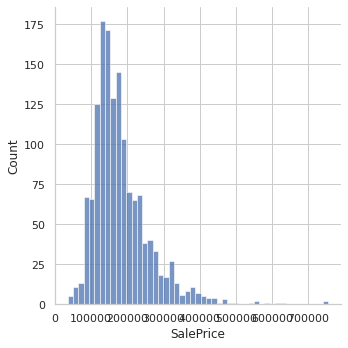

In [17]:
sns.displot(full_df['SalePrice']);

**SalePrice** distribution is asymmetrical and right skewed.

We may want to **apply log transformation** (or more complex transformation) to normalize the SalePrice shape. 

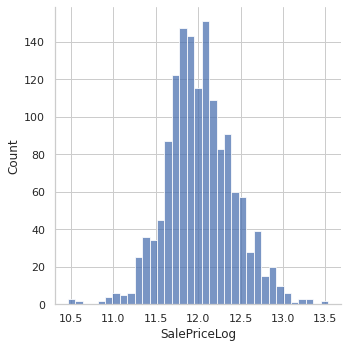

In [18]:
full_df['SalePriceLog'] = np.log(full_df['SalePrice'])

sns.displot(full_df['SalePriceLog']);

What about **SalePrice** central tendency?

In [19]:
full_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The **50%** of houses had price **$163 000** and less. 25%, 50% and 75% may define a price tiers for us to simplify understand relation between feature values and **SalePrice** data. With this in mind, let's add a new column **SalePriceGroup** with four tiers:

**Cheap Groups**:
* Less than 25% houses (<=$129k)
    
* Houses from 25%-50% range (>\\$129k and <=\\$163k)
    
**Expensive Groups**:
* Houses from **50%-75%** range (>\\$163k and <=\\$214k)
    
* **75%** and more 

In [20]:
def impute_sale_price_group(sale_price):
    if sale_price <= 129975:
        return '25% and less'
    if sale_price > 129975 and sale_price <= 163000:
        return '25% - 50%'
    if sale_price > 163000 and sale_price < 214000:
        return '50% - 75%'
    if sale_price >= 214000:
        return '75% and more'

full_df['SalePriceGroup'] = full_df['SalePrice'].apply(impute_sale_price_group)

After brief review of the terget feature, let's dig deeper into rest of the features. We will all features similiarly to what we have done in the beginning: 

## Room Number, Lot and Living Areas, Floor Areas

<img style="margin-left: 0" src="https://alphabet.ge/126/budget-double-or-twin-room.jpg" width="600px" />

**Living area** is a total area od internal part of the house where people spend most of the time being inside of the house.

Let's check **living area** distribution:

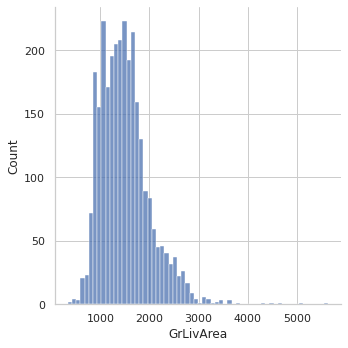

In [21]:
sns.displot(data=full_df['GrLivArea']);

**Living area** is right skewed. We may want to perform log transformation on it:

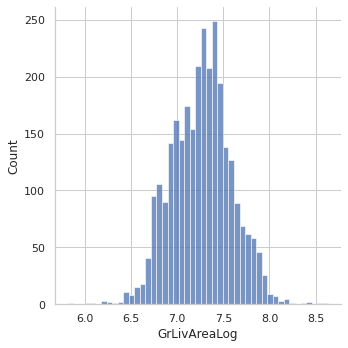

In [22]:
full_df['GrLivAreaLog'] = np.log(full_df['GrLivArea'])

sns.displot(data=full_df['GrLivAreaLog']);

**Living area** supposes to impact **SalePrice** and this is what we see on the next plot:

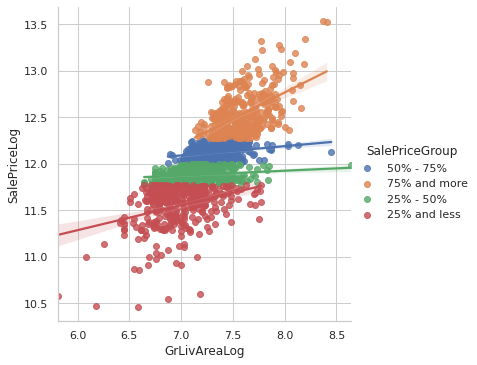

In [23]:
sns.lmplot(data=full_df, x='GrLivAreaLog', y='SalePriceLog', hue='SalePriceGroup');

We see a linear correlation and raising the SalePrice as the **living area** goes up/right. It's not surprising as living area is a common metric that affects home price.

There are two outliers. Their area more than 4,000 $ft^2$ but the sale prices are below than an average. Let's remove them from the dataset:

In [24]:
full_df.drop(
    full_df[(full_df['GrLivArea'] > 4000) & (full_df['SalePrice'] < 700000)].index,
    inplace=True
)

Next feature is **Total Room Number** (above ground). 

**Total Room Number** is also right skewed, so we will need to trasform it:

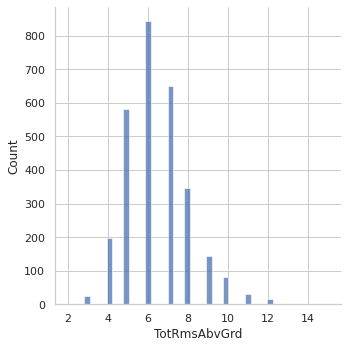

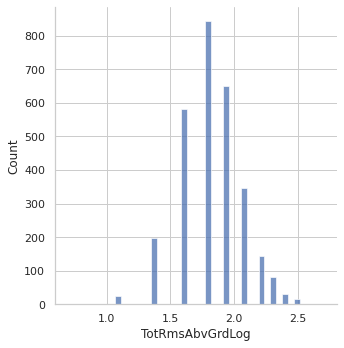

In [25]:
full_df['TotRmsAbvGrdLog'] = np.log(full_df['TotRmsAbvGrd'])

sns.displot(data=full_df['TotRmsAbvGrd'])
sns.displot(data=full_df['TotRmsAbvGrdLog']);

**Total Room Number** is connected to **Living Area** (correlation - **0.81**). The more living area, the more rooms normally present.

Room number seems to correlate with SalePrice as well (correlation - **0.54**).

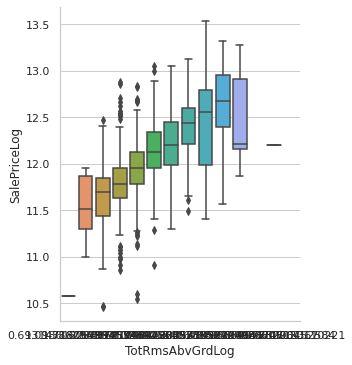

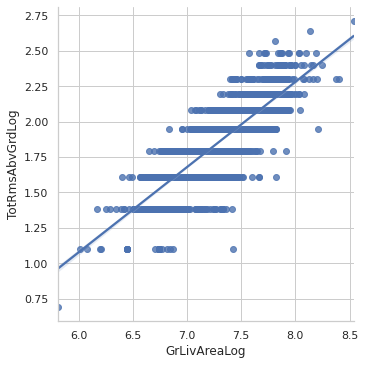

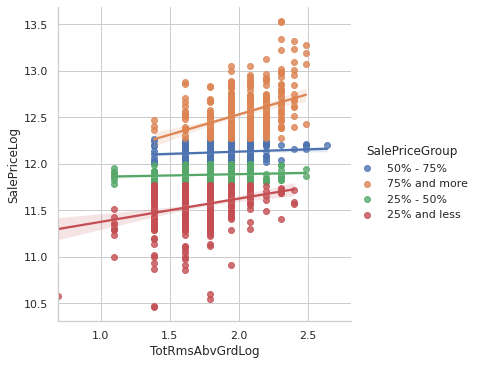

In [26]:
sns.catplot(data=full_df, x='TotRmsAbvGrdLog', y='SalePriceLog', kind='box')
sns.lmplot(data=full_df, x='GrLivAreaLog', y='TotRmsAbvGrdLog')
sns.lmplot(data=full_df, x='TotRmsAbvGrdLog', y='SalePriceLog', hue='SalePriceGroup');

To connect **Living Area** with **Room Number**, we can calculate an **average room area** (which happens to be skewed as well 😌): 

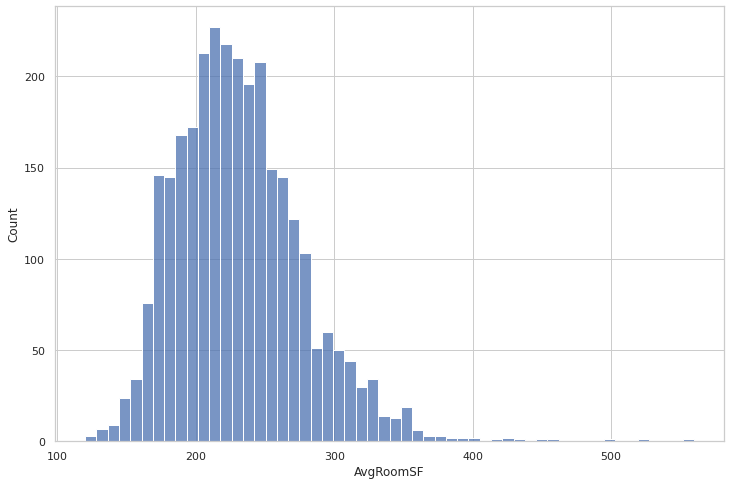

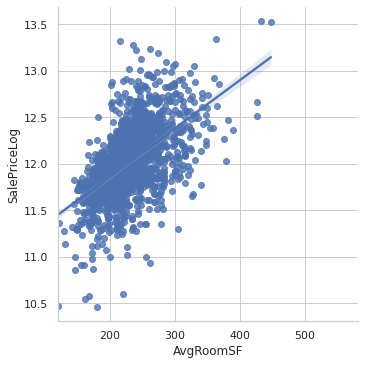

In [27]:
full_df['AvgRoomSF'] = full_df['GrLivArea'] / full_df['TotRmsAbvGrd']

sns.histplot(data=full_df, x='AvgRoomSF')
sns.lmplot(data=full_df, x='AvgRoomSF', y='SalePriceLog');

**Lot areas** is the next feature in the queue:

Most of the **lot areas** are **less than 50000 $ft^2$**. Probably, there might be some building standards that keep lot areas inside of the range.

That's why **Lot Area** just slightly correlates with **SalPrice** (correlation - **0.21**). It also one of the skewed features:

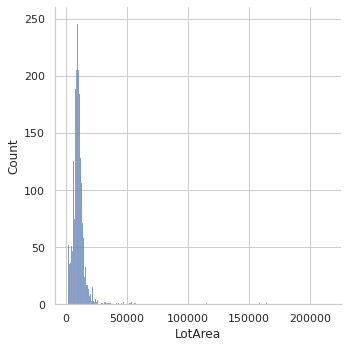

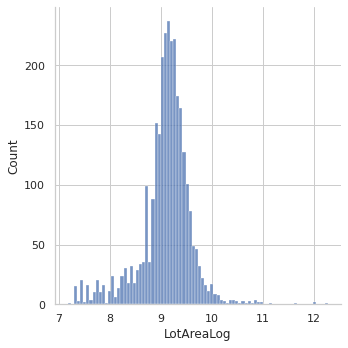

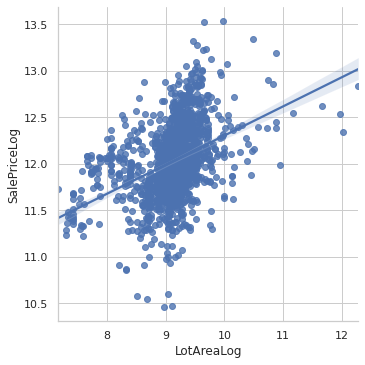

In [28]:
full_df['LotAreaLog'] = np.log(full_df['LotArea'])

sns.displot(data=full_df['LotArea'])
sns.displot(data=full_df['LotAreaLog'])
sns.lmplot(data=full_df, x='LotAreaLog', y='SalePriceLog');

Larger part of the houses have only **1 floor**:

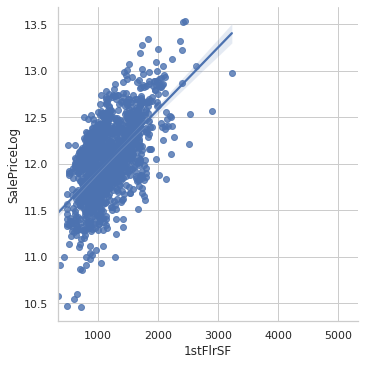

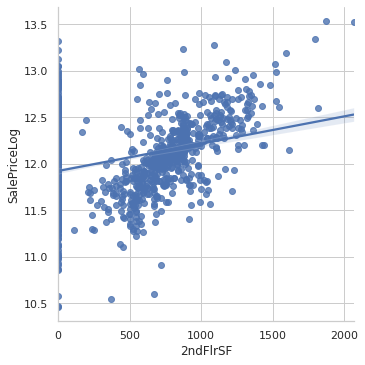

In [29]:
sns.lmplot(data=full_df, x='1stFlrSF', y='SalePriceLog')
sns.lmplot(data=full_df, x='2ndFlrSF', y='SalePriceLog');

**Floor areas** correlates with **SalePrice**. Namely, **SalePrice** seems to be linearly dependent on 1st floor area (and slightly on the 2nd floor area).

If we **summ 1st and 2nd floar areas**, we will get the **living area** feature. 

We nees to pay attension on the **finish quality** of living area as some house have living areas finished in **low quality**:

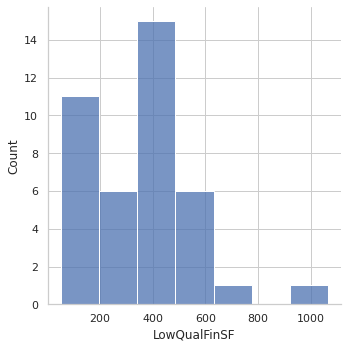

In [30]:
sns.displot(data=(full_df[full_df['LowQualFinSF'] > 0]['LowQualFinSF']));

The exact absolute area of low quality doesn't tell us much information. We may try to get how it related to the whole **living area**:

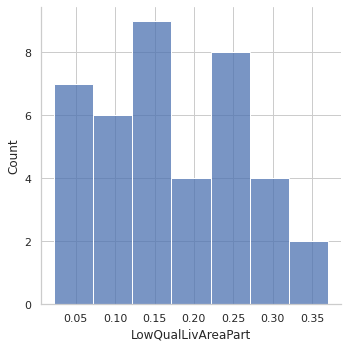

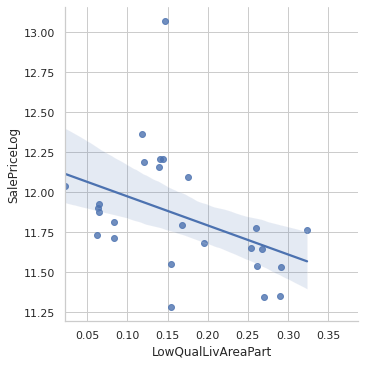

In [31]:
full_df['LowQualLivAreaPart'] = np.log1p(full_df['LowQualFinSF'] / full_df['GrLivArea'])

low_quality_finish_df = full_df[full_df['LowQualLivAreaPart'] > 0]

sns.displot(data=(low_quality_finish_df['LowQualLivAreaPart']))
sns.lmplot(data=low_quality_finish_df, x='LowQualLivAreaPart', y='SalePriceLog');

Just 40 houses had low quality finished area. It took up to 30% of living area.

## House Types and Styles

<img style="margin-left: 0" src="https://st.hzcdn.com/simgs/pictures/exteriors/exterior-knight-construction-design-inc-img~333123010ec2c3ca_4-3527-1-e24d363.jpg" width="600px" />

Dataset contains three features related to **house building style**:
- **house style** - a house structure type with respect to levels and stories
- **dwellig type** - a house family capacity type
- **dwelling subclass** - a house structure type plus some additional conditions

**House Style** contains information about house height in stories. A **story** is any level part of a building with a floor that could be used by people. 

**House Style** correlates with **sale prices**.
**1Story, 1.5Fin and 2Story** are the most popular options. **2Story** houses were especially popular among **75%+** house tier.

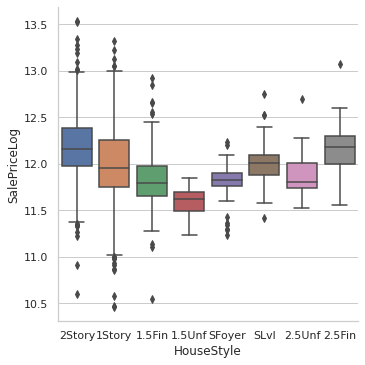

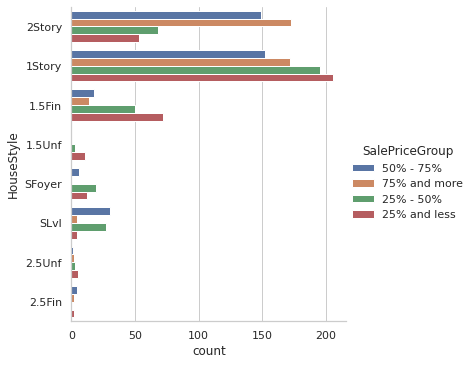

In [32]:
sns.catplot(data=full_df, x='HouseStyle', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, y='HouseStyle', hue='SalePriceGroup', kind='count');

<img style="margin-left: 0" src="https://upload.wikimedia.org/wikipedia/en/8/88/Traditional_Side_Split_Level_Home.jpg" width="600px" />

**Split or multilevel houses** - is a style of house in which the floor levels are staggered. There are typically two short sets of stairs, one running upward to a bedroom level, and one going downward toward a basement area.

**Split foyer** is a similar two-story house that has a small entrance foyer with stairs that "split" — part of a flight of stairs go up (to bedrooms, for example) and part of a flight of stairs go down (usually to a family room and garage/storage area).

In addition, **House Style** contains information about house state (finished/unfinished) which affects **SalePrice**. Finished houses tended to be more expensive:

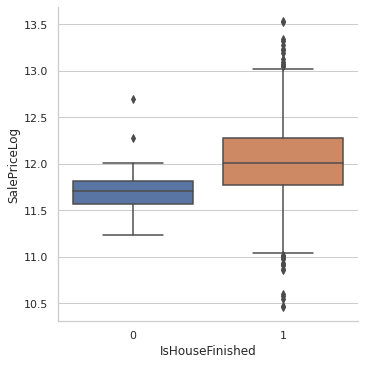

In [33]:
full_df['IsHouseFinished'] = (full_df['HouseStyle'].isin(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Fin'])) * 1

sns.catplot(data=full_df, x='IsHouseFinished', y='SalePriceLog', kind='box');

**Building Type** has 4 types:
- **1 family house**
- **2 family conversion** house - 1 family house that was upgraded to 2 family
- **Duplex** - a multi-family home that has two units in one building (regardless of how those homes are arranged)
- **Townhouse** - a kind of <a href="https://en.wikipedia.org/wiki/Terraced_house">terraced house</a>. Townhouses may be in inside or end unit configuration.

**Building Type** correlates with **sale price**. 

**1Fam** and **TwnhsE** types were preferable among 75% tier houses. Generally, **1 family** houses was the most popular house style in the datbase. 

**Inside townhouses** costed less than **end unit** ones. End units have only one "neighbor" and potentially more windows (so more lights inside of the house) and better air conditioning.

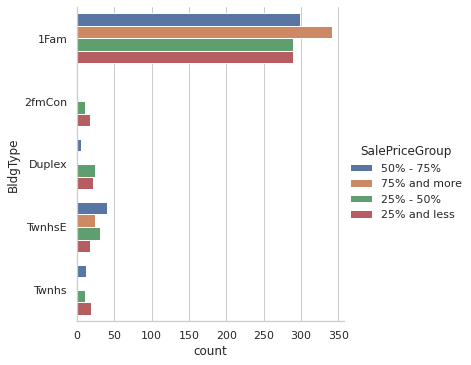

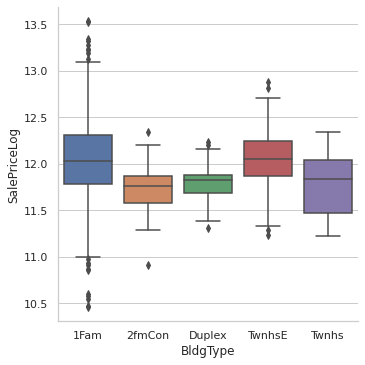

In [34]:
sns.catplot(data=full_df, y='BldgType', hue='SalePriceGroup', kind='count')
sns.catplot(data=full_df, x='BldgType', y='SalePriceLog', kind='box');

**MSSubClass** is a combined feature. It contains **House Style** information, house style age and PUD information.

75% tier houses tended to be built in a **new house styles** (1946 and newer) with a **finished** state. In contrast, 25% tier houses were build in **older house styles** and/or **unfinished**:

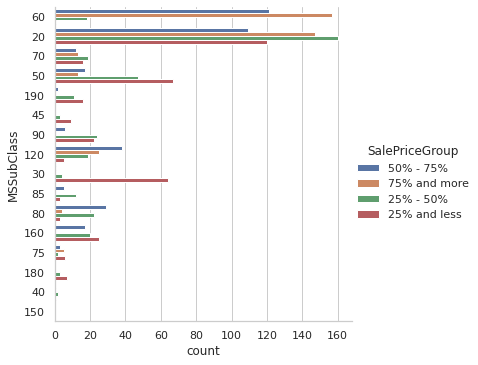

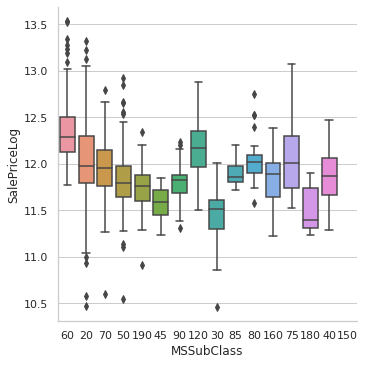

In [35]:
sns.catplot(data=full_df, y='MSSubClass', hue='SalePriceGroup', kind='count')
sns.catplot(data=full_df, x='MSSubClass', y='SalePriceLog', kind='box');

To separate old house styles from a new, we can engineer a **IsModernHouseType** flag (which correlates with **SalePrice**; Newer houses are more expensive then old one):

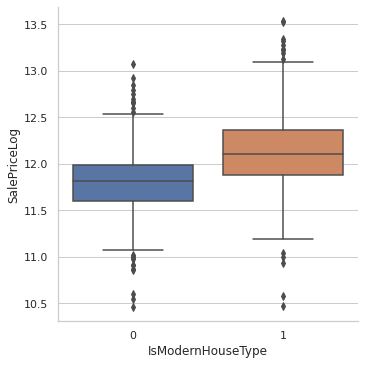

In [36]:
full_df['IsModernHouseType'] = full_df['MSSubClass'].map({
    '20': 1, 
    '30': 0, 
    '40': 0, 
    '45': 0, 
    '50': 0, 
    '60': 1, 
    '70': 0, 
    '75': 0,
    '80': 0, 
    '85': 0, 
    '90': 0, 
    '120': 1, 
    '150': 0, 
    '160': 1, 
    '180': 0, 
    '190': 0,
})

sns.catplot(data=full_df, x='IsModernHouseType', y='SalePriceLog', kind='box');

<img style="margin-left: 0" src="https://i.pinimg.com/originals/83/e3/55/83e3550d85f3032b7c7905a1e8740d44.jpg" width="600px" />

A **Planned Unit Development (PUD)** is a community of homes that could look like single family residences. PUDs often have amenities beyond the scope of most condos, like private tennis courts and outdoor playgrounds that are maintained by HOA fees and only open to homeowners. 

More Info: https://www.redfin.com/guides/what-is-a-planned-unit-development

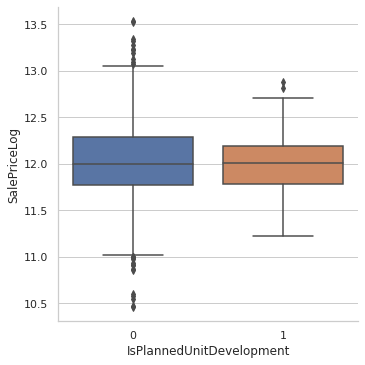

In [37]:
full_df['IsPlannedUnitDevelopment'] = full_df['MSSubClass'].map({
    '20': 0, 
    '30': 0, 
    '40': 0, 
    '45': 0, 
    '50': 0, 
    '60': 0, 
    '70': 0, 
    '75': 0,
    '80': 0, 
    '85': 0, 
    '90': 0, 
    '120': 1, 
    '150': 1, 
    '160': 1, 
    '180': 1, 
    '190': 0,
})

sns.catplot(data=full_df, x='IsPlannedUnitDevelopment', y='SalePriceLog', kind='box');

However, PUD doesn't seem to affect the sale price.

## LotShape and LotConfig

<img style="margin-left: 0" src="https://www.idesignarch.com/wp-content/uploads/Irregular-Shaped-House-David-Jameson_1.jpg" width="600px" />

Most of lots had a regular **shape**. Houses with irregular shape was sold with **higher price**. 

Lots might have irregular shape due to outstanding designer work on the house look:

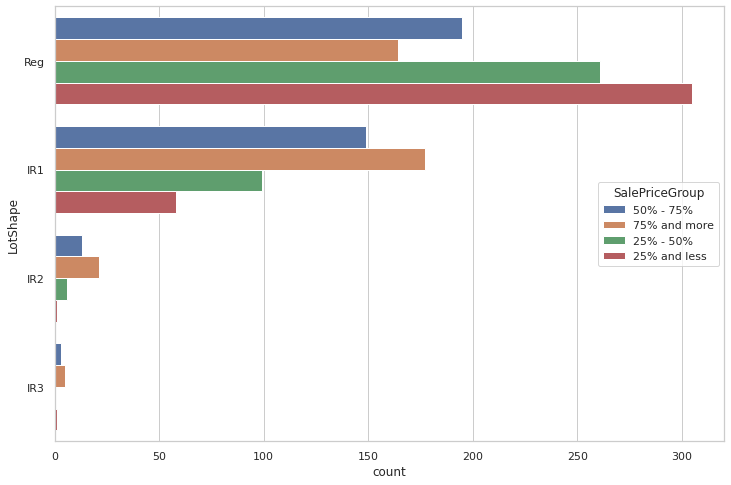

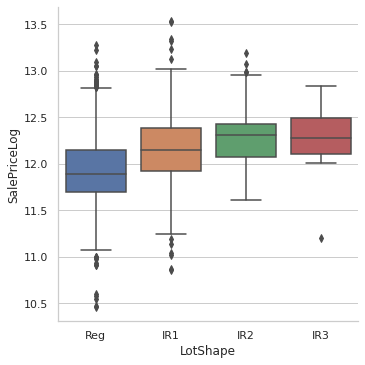

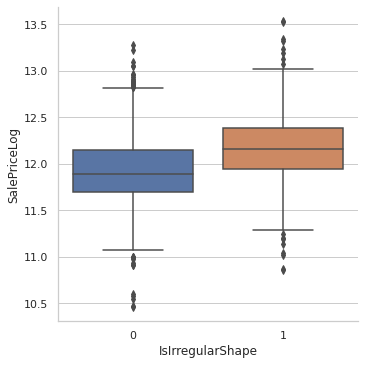

In [38]:
sns.countplot(data=full_df, y='LotShape', hue='SalePriceGroup')
sns.catplot(data=full_df, x='LotShape', y='SalePriceLog', kind='box')

full_df['IsIrregularShape'] = full_df['LotShape'].map({
    'Reg': 0,
    'IR1': 1,
    'IR2': 1,
    'IR3': 1,
})

sns.catplot(data=full_df, x='IsIrregularShape', y='SalePriceLog', kind='box');

<img style="margin-left: 0" src="https://cdn.coloradoparent.com/2019/02/CSG1902_YourTurn_CulDeSac.jpg" width="600px" />

**Lot configuration** is a position of the house with respect to neighbors. **Inside** house units are the most frequent in the dataset.

**Dead end** units (**Cul De Sac**) had higher price and bigger percentage of 75%+ tier houses. This type of configuration is typically more silent (because of dead end there are less car enters the street) and it could provide more privacy.

Large percentage of **frontage on 3 sides** units were from 50%+ tiers.

More info: 
- https://www.thetruthaboutrealty.com/real-estate-lot-types/
- https://www.fool.com/millionacres/real-estate-market/articles/pros-and-cons-of-living-in-a-cul-de-sac/

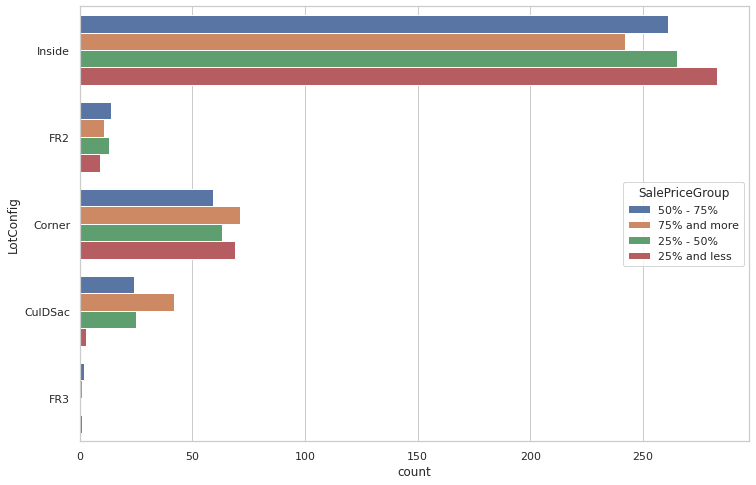

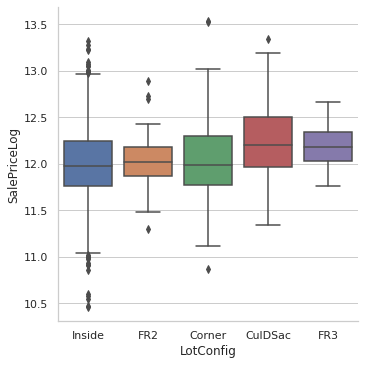

In [39]:
sns.countplot(data=full_df, y='LotConfig', hue='SalePriceGroup')
sns.catplot(data=full_df, x='LotConfig', y='SalePriceLog', kind='box');

<img style="margin-left: 0" src="https://i.pinimg.com/originals/73/42/79/7342799b300e2a8a6493426909d6beaa.jpg" />

**Frontage** is width of a lot, measured at the front part of the lot. **Footage** correlates with **LotArea** (the bigger lot area, the bigger frontage). **Frontage** is also a skewed feature:

More Info: https://www.gimme-shelter.com/frontage-50043/

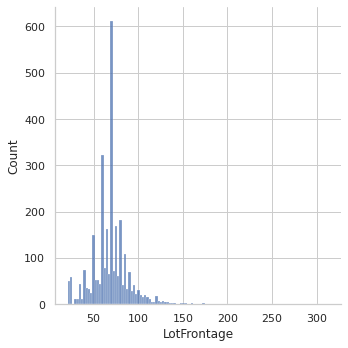

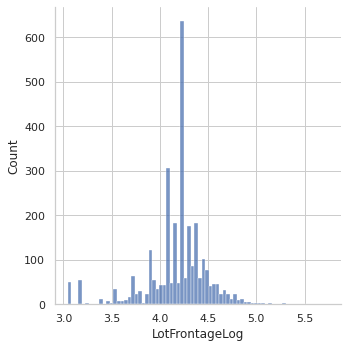

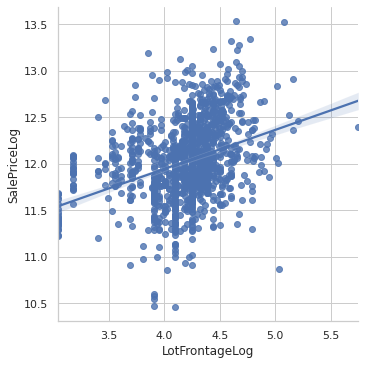

In [40]:
full_df['LotFrontageLog'] = np.log(full_df['LotFrontage'])

sns.displot(full_df['LotFrontage'])
sns.displot(full_df['LotFrontageLog'])
sns.lmplot(data=full_df, x='LotFrontageLog', y='SalePriceLog');

**SalePrice** seems to be linearly dependent on the **Frontage**. 
Wider houses are more valuable than "deep" one. A wider lot will allow for a larger house, and often allow for more space between homes or buildings. Wide lots also allow decent parking on front streets or duplexes to be built on the lot as long as the zoning permits it

## LandContour and LandSlope

<img style="margin-left: 0" src="https://res.cloudinary.com/trends-publishing/image/upload/ar_1.8,c_thumb,dpr_2.0,g_center,w_800/f_auto,q_auto:best/0152817.jpg" width="600px" />

Most homes were built on **near flat/gentle slope** land. Large part of houses with **land slopes** were in 75%+ tier. We may assume that some kind of house/landscape design work were done for those lots:

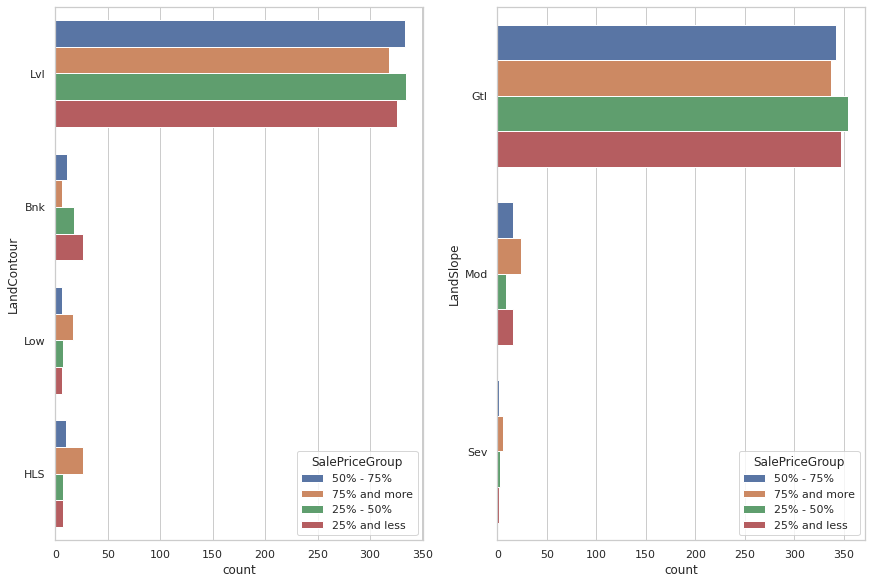

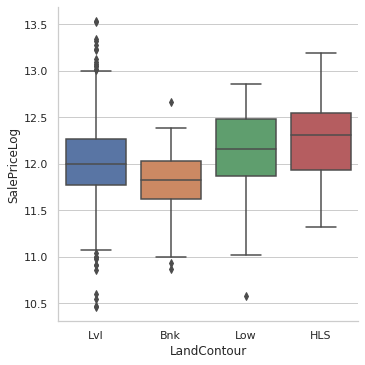

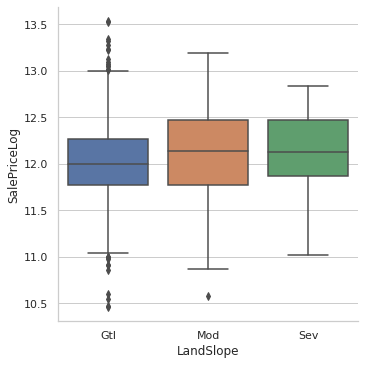

In [41]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='LandContour', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='LandSlope', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='LandContour', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='LandSlope', y='SalePriceLog', kind='box');

## Foundation and Basement

<img style="margin-left: 0" src="https://i.pinimg.com/736x/d2/41/da/d241da589a358ca41be75dbacb968815.jpg" />

**Basement** is part of house that located below the ground. 

When it's **finished**, basement can be pretty helpfull. There may be located a bathroom or cozy corner for the rest.

While **basement area** is not that attractive as above ground one, it still strongly correlates with **SalePrice** (but a non-linear line would fit this relation better).

**Basement area** has right skewed distribution and may require log transformation.

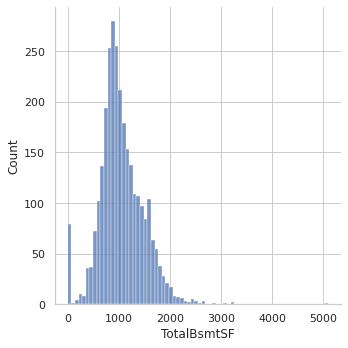

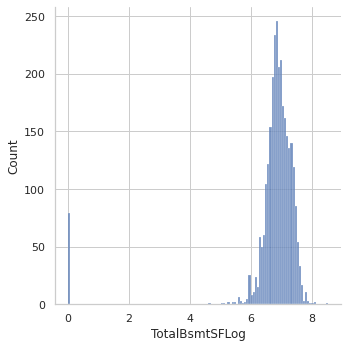

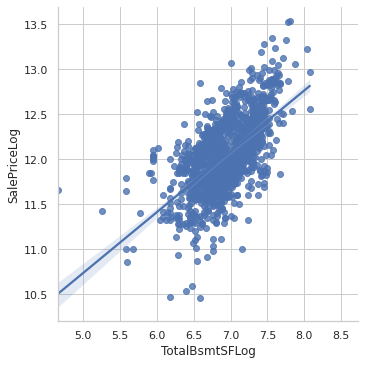

In [42]:
full_df['TotalBsmtSFLog'] = np.log1p(full_df['TotalBsmtSF'])

basement_df = full_df[full_df['TotalBsmtSF'] > 0]

sns.displot(full_df['TotalBsmtSF'])
sns.displot(full_df['TotalBsmtSFLog'])

sns.lmplot(data=basement_df, x='TotalBsmtSFLog', y='SalePriceLog');

**Basement Quality** and **Condition** should help us to elaborate a part of **SalePrice** that the **basement** brings:

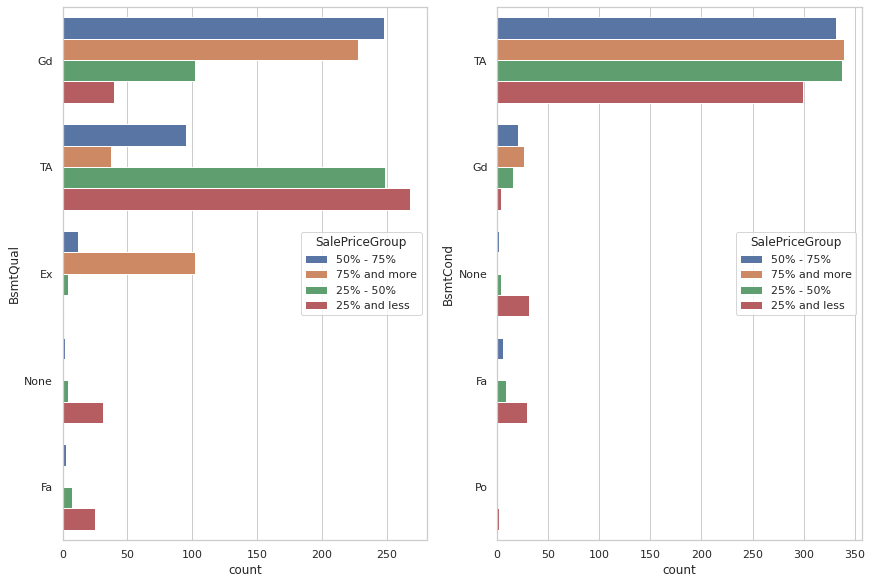

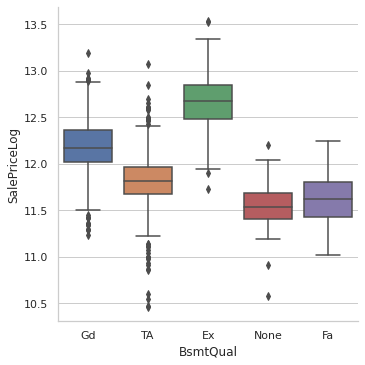

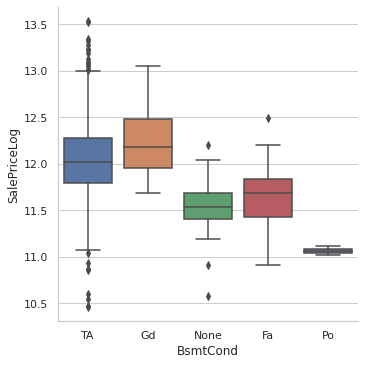

In [43]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='BsmtQual', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='BsmtCond', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='BsmtQual', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='BsmtCond', y='SalePriceLog', kind='box');

**Basement Quality and Condition** show a common situation: 50%+ house tier has basements with **above average conditions** and built from **quality materials**.

Usefull to see **Basement Quality and Condition** intersection:

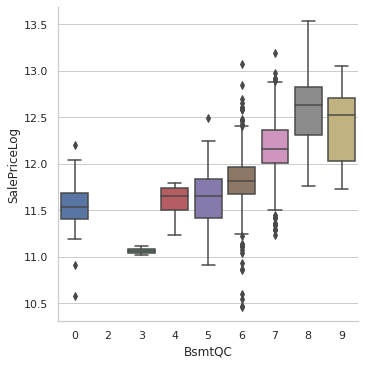

In [44]:
full_df['BsmtQC'] = full_df['BsmtQualEnc'] + full_df['BsmtCondEnc']

sns.catplot(data=full_df, x='BsmtQC', y='SalePriceLog', kind='box');

Another metric of basement usefulness is whenever **basement** is **finished** or not and how exactly:

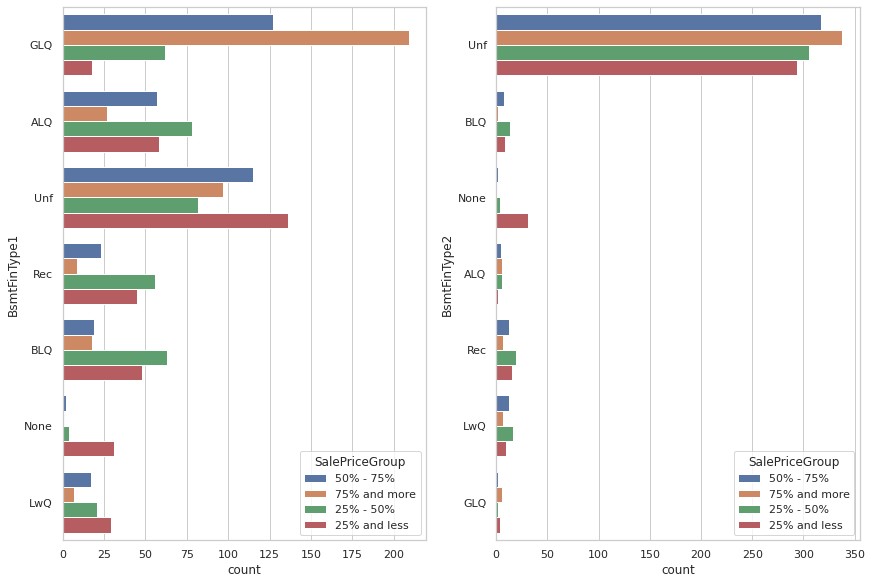

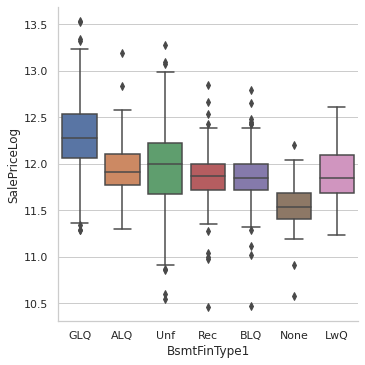

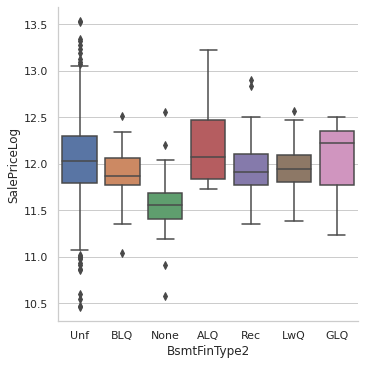

In [45]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='BsmtFinType1', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='BsmtFinType2', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='BsmtFinType1', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='BsmtFinType2', y='SalePriceLog', kind='box');

todo: basement finish types represent the same options. Need to see if there are any oppotinity to engineer features.

**Basement** area may be finished in different ways. It can be turned into recreation, living quarters or bathrooms:

More Info: 
- https://www.cidbasements.com/qualifies-finished-basement

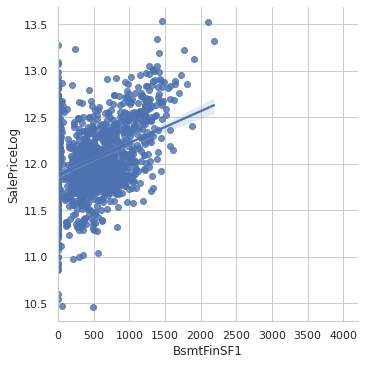

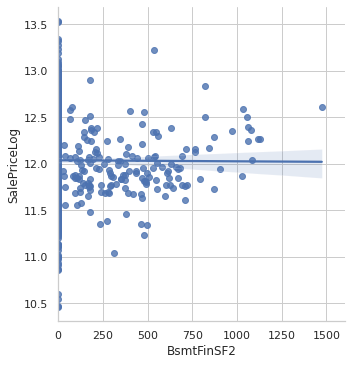

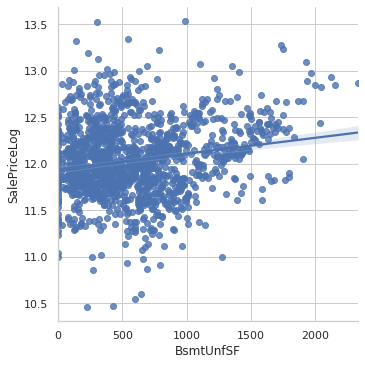

In [46]:
sns.lmplot(data=basement_df, x='BsmtFinSF1', y='SalePriceLog')
sns.lmplot(data=basement_df, x='BsmtFinSF2', y='SalePriceLog')
sns.lmplot(data=basement_df, x='BsmtUnfSF',  y='SalePriceLog');

Essentially, **TotalBsmtSF** is a sum of **BsmtFinSF1**, **BsmtFinSF2** and **BsmtUnfSF**. 

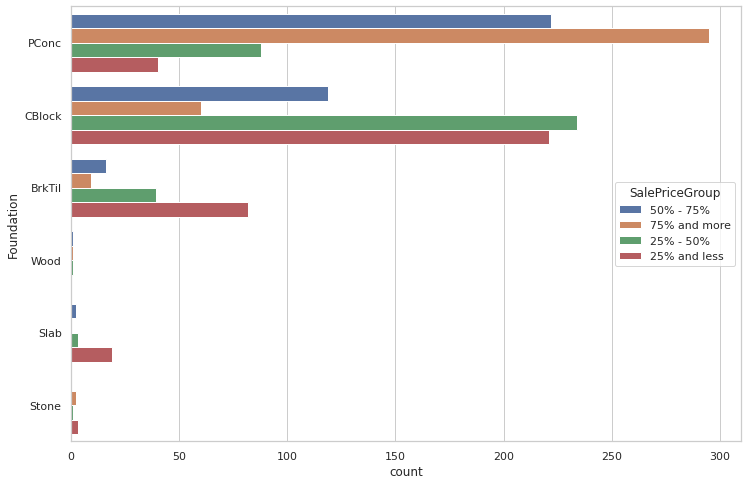

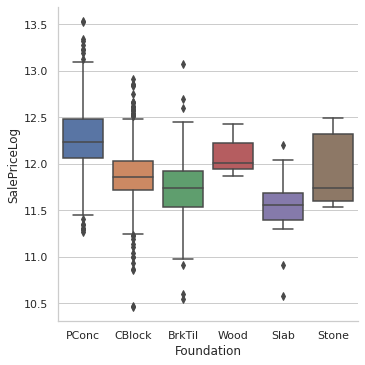

In [47]:
sns.countplot(data=full_df, y='Foundation', hue='SalePriceGroup')
sns.catplot(data=full_df, x='Foundation', y='SalePriceLog', kind='box');

**Poured Contrete** foundation is popular in >50% tier. It seems to be a **modern way** to found houses. The rest of types may be just **old fashion**.

## Basement Exposure

<img style="margin-left: 0" src="https://i.pinimg.com/originals/28/4d/e6/284de644ff254abcda378ee0d2c5c04a.jpg" width="600px" />

**Basement exposure** is one more way to describe how outstanding houses were. Lots with **basement exposure** dominates in 75%+ tier and the most common is to have **no exposure**:

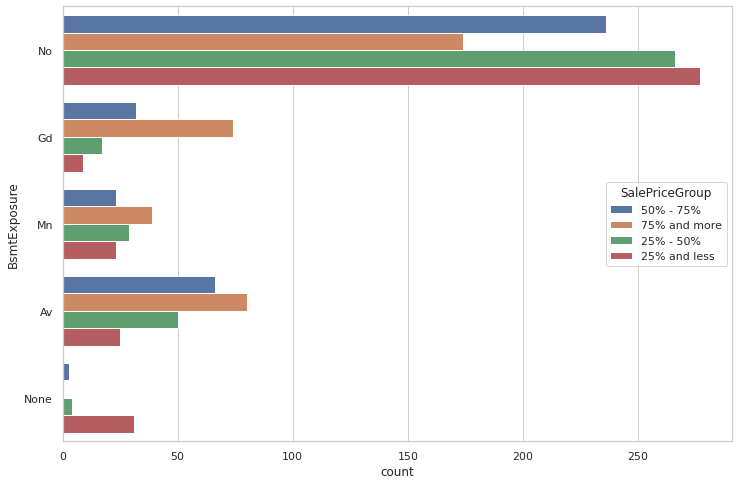

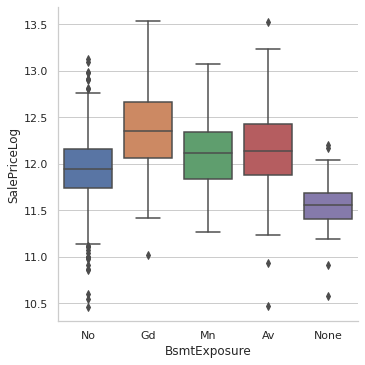

In [48]:
sns.countplot(data=full_df, y='BsmtExposure', hue='SalePriceGroup')
sns.catplot(data=full_df, x='BsmtExposure', y='SalePriceLog', kind='box');

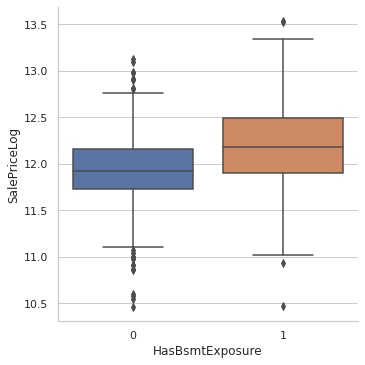

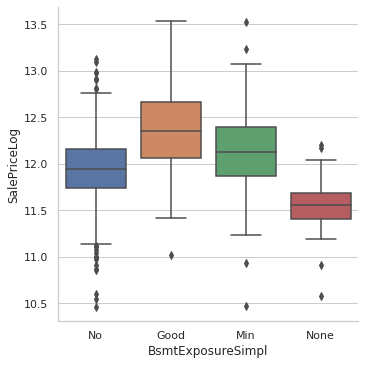

In [49]:
dataframe['HasBsmtExposure'] = dataframe['BsmtExposure'].map({
    'None': 0,
    'No': 0,
    'Mn': 1,
    'Av': 1,
    'Gd': 1
})
full_df['BsmtExposureSimpl'] = full_df['BsmtExposure'].map({
    'None': 'None',
    'No': 'No',
    'Mn': 'Min',
    'Av': 'Min',
    'Gd': 'Good'
})

sns.catplot(data=full_df, x='HasBsmtExposure', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='BsmtExposureSimpl', y='SalePriceLog', kind='box');

## Overall House Condition and Material Quality

<img style="margin-left: 0" src="https://www.budgetdumpster.com/blog/wp-content/uploads/2017/01/10536647_773081569381434_3547273328886035963_o.jpg" width="600px" />

**Overall Condition** and **Overall Material Quality** strongly correlates with SalePrices.

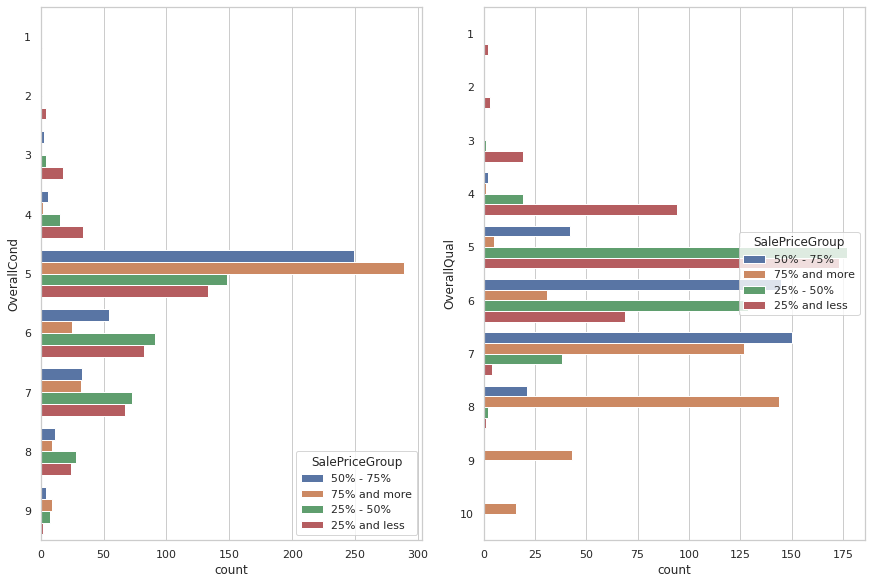

In [50]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='OverallCond', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='OverallQual', hue='SalePriceGroup', ax=ax[1]);

Houses from 50%+ tier have **average and higher overall** condition. Lots from 50%- tier have a higher percentage among **below average condition** houses, but generally they are included to all condition groups.

**Overall Material Quality** seems to differentiate expensive houses from cheap ones. Lots from 50%- tier dominates in average and below quality groups. In above average quality groups, there are a bigger percentage of houses from 50%+ tier (particularly, lots from 75%+ tier prevail in "very good" and above quality groups).

Let's try to create **Overall House QC** metric:

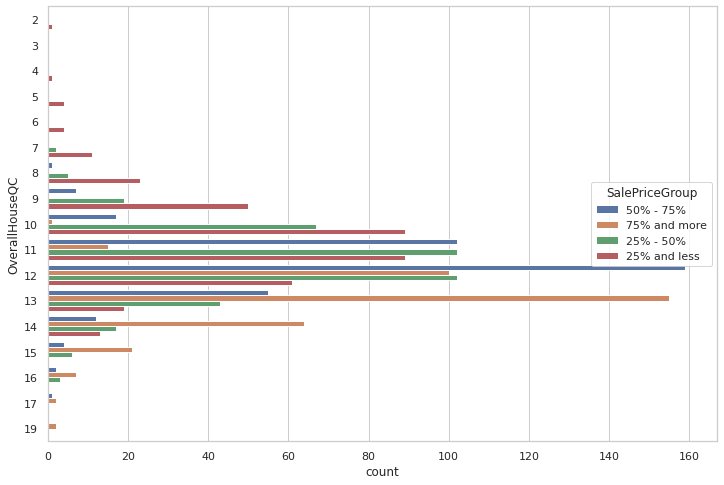

In [51]:
full_df['OverallHouseQC'] = full_df['OverallCond'] + full_df['OverallQual']

sns.countplot(data=full_df, y='OverallHouseQC', hue='SalePriceGroup');

Also, let's try to bin these metrics as we get a lot of categories:

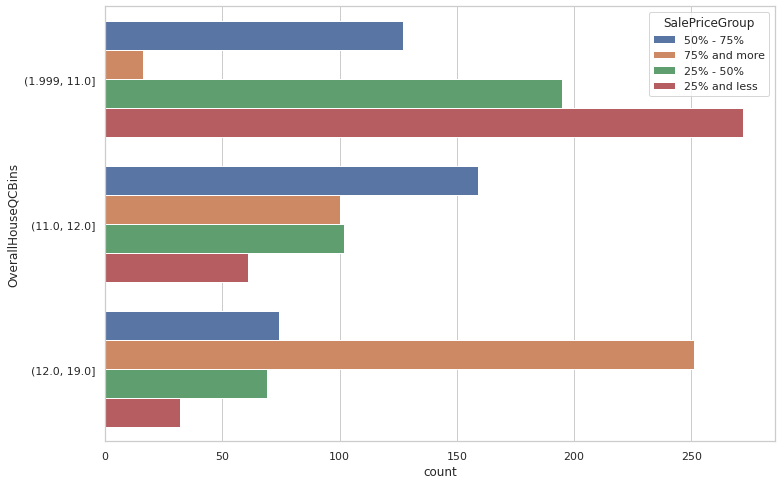

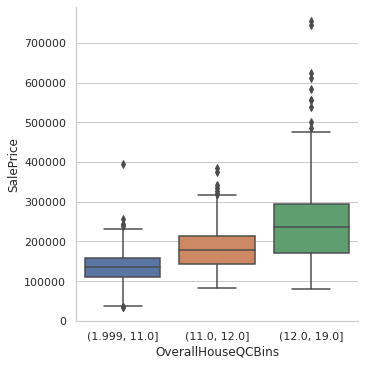

In [52]:
full_df['OverallHouseQCBins'] = pd.qcut(full_df['OverallHouseQC'], q=3)

sns.countplot(data=full_df, y='OverallHouseQCBins', hue='SalePriceGroup')
sns.catplot(data=full_df, x='OverallHouseQCBins', y='SalePrice', kind='box');

Three bins diffentiate houses well from what we can see on the boxplot.

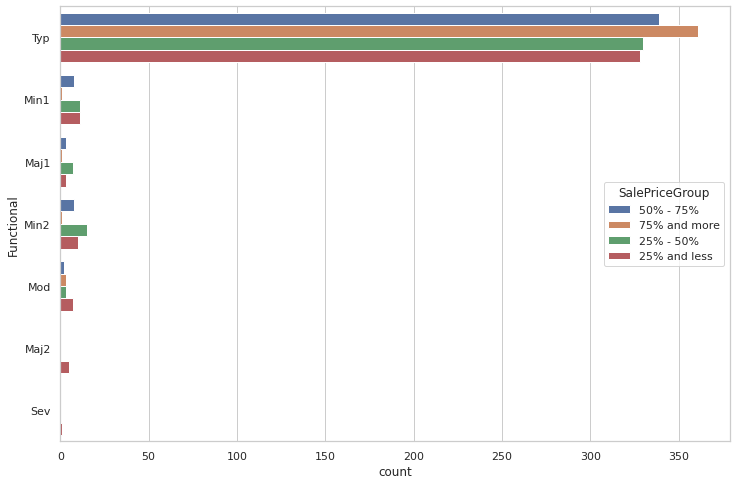

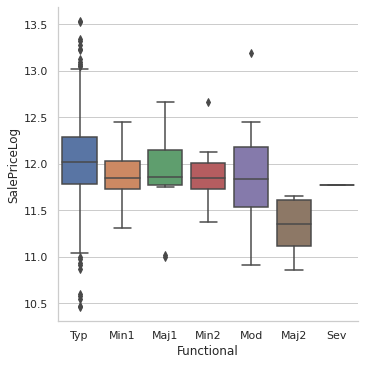

In [53]:
sns.countplot(data=full_df, y='Functional', hue='SalePriceGroup')
sns.catplot(data=full_df, x='Functional', y='SalePriceLog', kind='box');

Samples with a functionality other than "Typical" **losses sale prices drastically**. 

Other types of functionality were much less frequent. So we may benefit from turning **Functional** feature into flag or reduce number of groups:

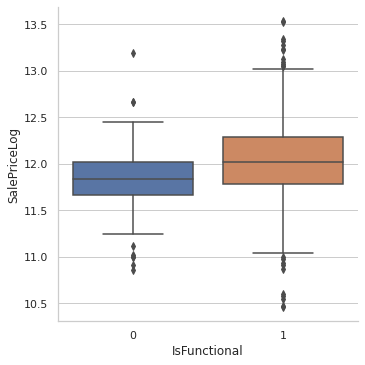

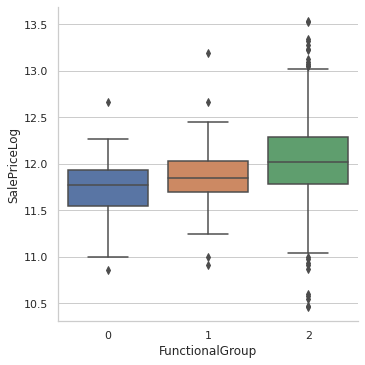

In [54]:
full_df['IsFunctional'] = (full_df['Functional'] == 'Typ') * 1
full_df['FunctionalGroup'] = full_df['Functional'].map({
    'Typ': 2,
    'Min1': 1,
    'Min2': 1,
    'Mod': 1,
    'Maj1': 0,
    'Maj2': 0,
    'Sev': 0,
    'Sav': 0,
})

sns.catplot(data=full_df, x='IsFunctional', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='FunctionalGroup', y='SalePriceLog', kind='box');

## Year Built and Renovate

<img style="margin-left: 0" src="https://diligentdevelopments.co.uk/wp-content/uploads/2018/09/property-refurbishment-house-renovation.jpeg" width="600px" />

Let's see how old were houses in the dataset and when they were remodeled:

In [55]:
full_df[['YearBuilt', 'YearRemodAdd']].describe().transpose()

count         mean        std     min     25%     50%     75%  \
YearBuilt     2917.0  1971.287967  30.286991  1872.0  1953.0  1973.0  2001.0   
YearRemodAdd  2917.0  1984.248200  20.892257  1950.0  1965.0  1993.0  2004.0   

                 max  
YearBuilt     2010.0  
YearRemodAdd  2010.0

The dataset covers houses that were build between 1872 and 2010 (138 years). It's 10-years old as of now (2020) which is okay for training purpose, but will be not that useful for production.

How did **YearBuild** affect **SalePrice**?

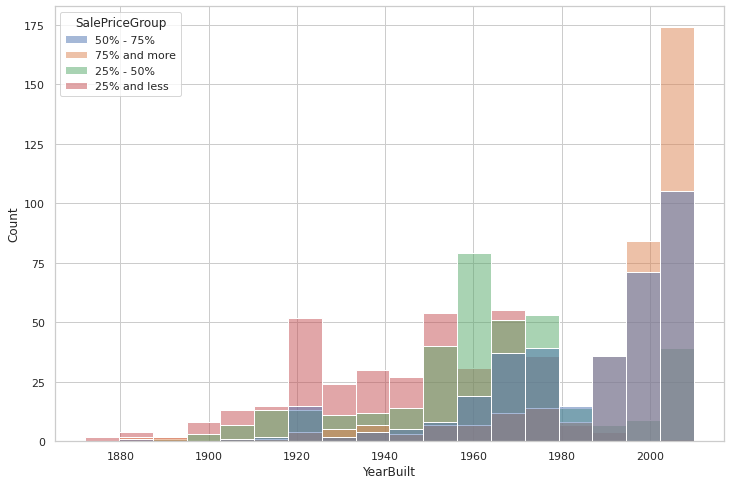

In [56]:
sns.histplot(data=full_df, x='YearBuilt', hue='SalePriceGroup');

**Most of the cheap houses** (<50% tier) were built in between of **1872 and 1970**.
**Expensive houses (>50% tier)** had been built after that time.

We can assume that people prefer to **buy newly build** houses. They may have better condition and better building techniques involved. 

Were there any houses that were sold exactly in a year they had been built/remodeled?

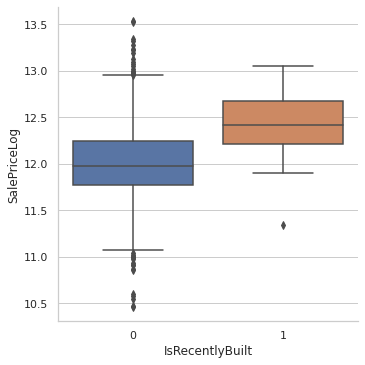

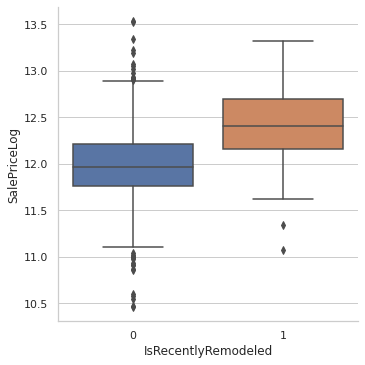

In [57]:
full_df['IsRecentlyBuilt'] = (full_df['YearBuilt'] == full_df['YrSold'].astype(int)) * 1
full_df['IsRecentlyRemodeled'] = (full_df['YearRemodAdd'] == full_df['YrSold'].astype(int)) * 1

sns.catplot(data=full_df, x='IsRecentlyBuilt', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsRecentlyRemodeled', y='SalePriceLog', kind='box');

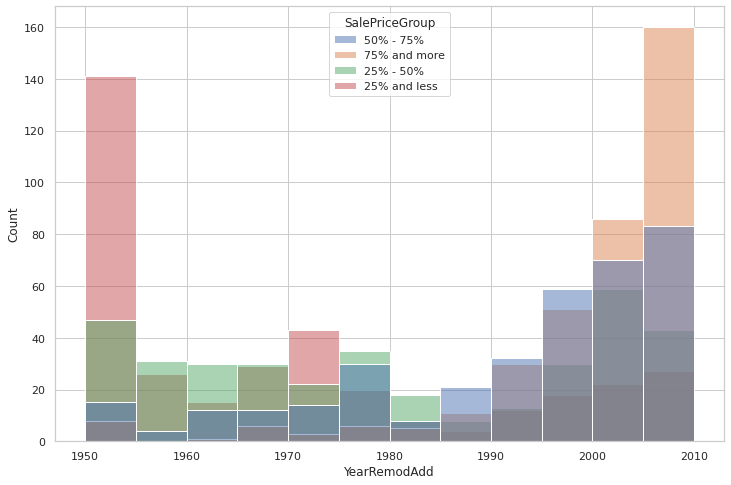

In [58]:
sns.histplot(data=full_df, x='YearRemodAdd', hue='SalePriceGroup');

Recently remodeled houses had **higher price**. Remodeling improves condition of the house, so there is no surprises.

Let's check how time that passed since remodeling impacts sale price:

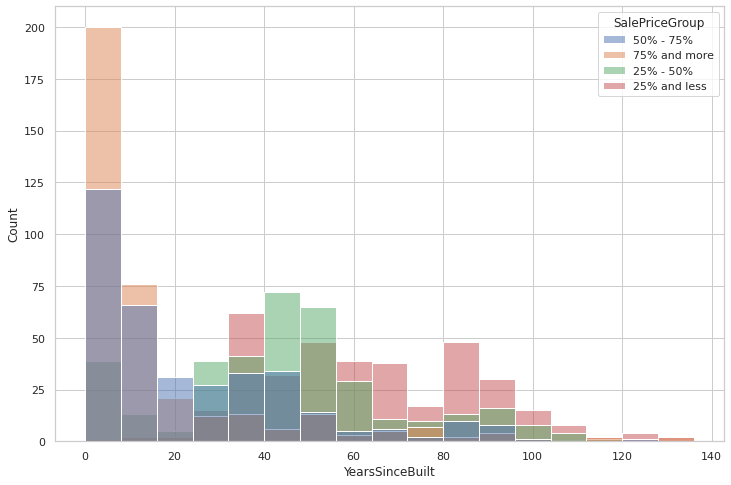

In [59]:
full_df['YearsSinceBuilt'] = full_df['YrSold'].astype(int) - full_df['YearBuilt'].astype(int)
full_df['YearsSinceRemod'] = full_df['YrSold'].astype(int) - full_df['YearRemodAdd'].astype(int)
full_df['Remodeled'] = (full_df['YearRemodAdd'] != full_df['YearBuilt']) * 1

sns.histplot(data=full_df, x='YearsSinceBuilt', hue='SalePriceGroup');

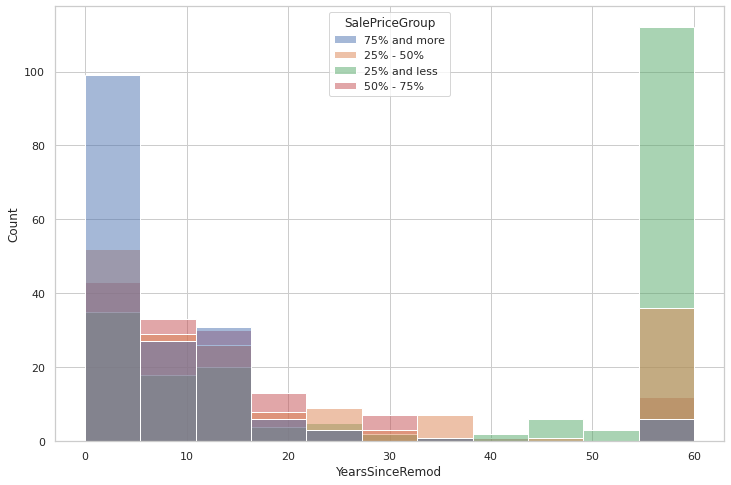

In [60]:
sns.histplot(data=full_df[full_df['Remodeled'] == 1], x='YearsSinceRemod', hue='SalePriceGroup');

As we can see, the longer time has passed since built/remodeling the cheaper house would be. Namely, most of expensive houses had been remodeled **25 years ago or less** before they were sold. Also, the most expensive houses were built **20 years ago or less**.

Needs to say that the exact year of building or remodeling is not important for us and may bring a lot of noice to the model. We would like to **bin age metrics** instead using **10-20** year bins (pretty much like on the plots).

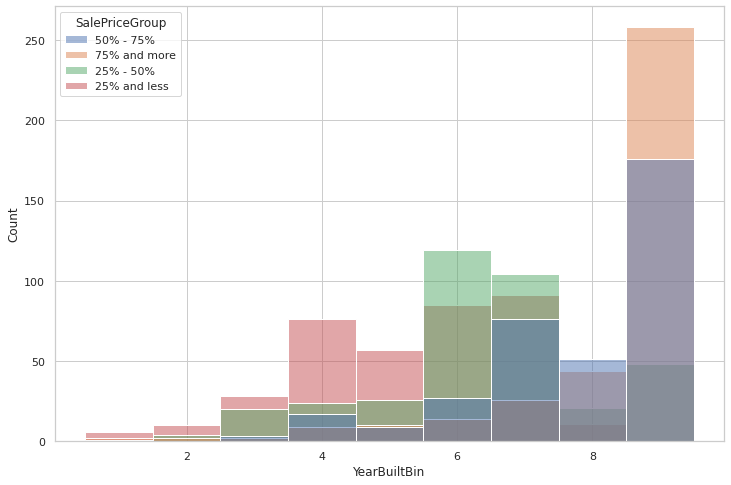

In [61]:
year_built_bins = np.linspace(1871, 2010, 10) # 10 bins
full_df['YearBuiltBin'] = pd.cut(full_df['YearBuilt'], bins=year_built_bins, labels=range(1, 10)) 

sns.histplot(data=full_df, x='YearBuiltBin', hue='SalePriceGroup');

## House Access

<img style="margin-left: 0" src="https://junkmailimages.blob.core.windows.net/large/6358c1a8736142cbb3f23b492d08fbe0.jpg" width="600px" />

Most houses had **paved streets** and paved drive connected to them and did not have **alley** accesses:

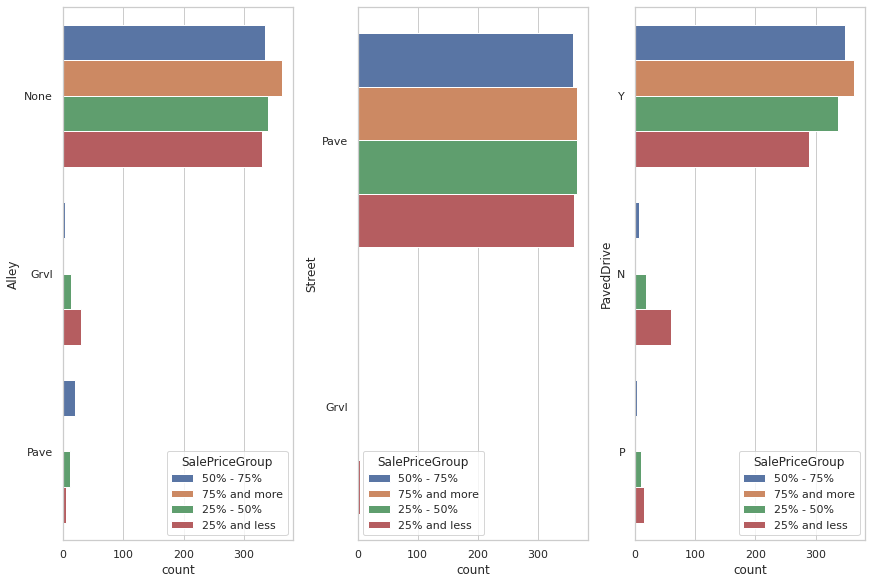

In [62]:
fig, ax = plt.subplots(1, 3, constrained_layout=True)

sns.countplot(data=full_df, y='Alley', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='Street', hue='SalePriceGroup', ax=ax[1])
sns.countplot(data=full_df, y='PavedDrive', hue='SalePriceGroup', ax=ax[2]);

We can reduce amount of noice by convering **PavedDrive** feature into a flag:

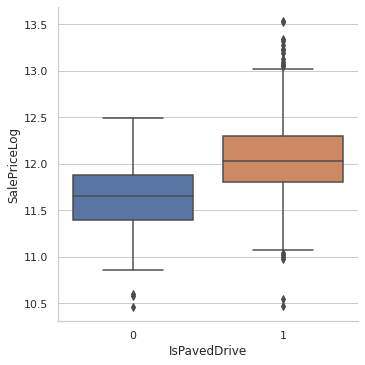

In [63]:
full_df['IsPavedDrive'] = (full_df['PavedDrive'] == 'Y') * 1

sns.catplot(data=full_df, x='IsPavedDrive', y='SalePriceLog', kind='box');

## House Location: Neighborhood, Zoning and Additional Conditions

<img style="margin-left: 0" src="https://www.lendinghome.com/blog/wp-content/uploads/2018/11/houses-in-the-same-neighborhood.jpg" width="600px" />

**Neighborhood** and **MSZoning** did correlate with **SalePrice**.

**Neighborhood** Insights

- Neighborhoods with house price below the mean: IDOTRR, Swisu, DrDale, NPkVill, MeadowV, Sawyer, OldTown, Edwards, NAmes
- Neighborhoods with house price above the mean: NoRidge, Mitchel, Crawfor, SawyerW, Timber, Somerst, CollgeCr, Gilbert, NWAmes
- Neighborhoods with house price above 75% perct: NridgHt, CollgeCr, Crawfor, Timber, StoreBr

**Zoning** Insights:
- Zoning with house price above the mean: RL, FV
- Zoning with house price below the mean: RM, C, RH

More Information:
- https://www.investopedia.com/terms/z/zoning.asp

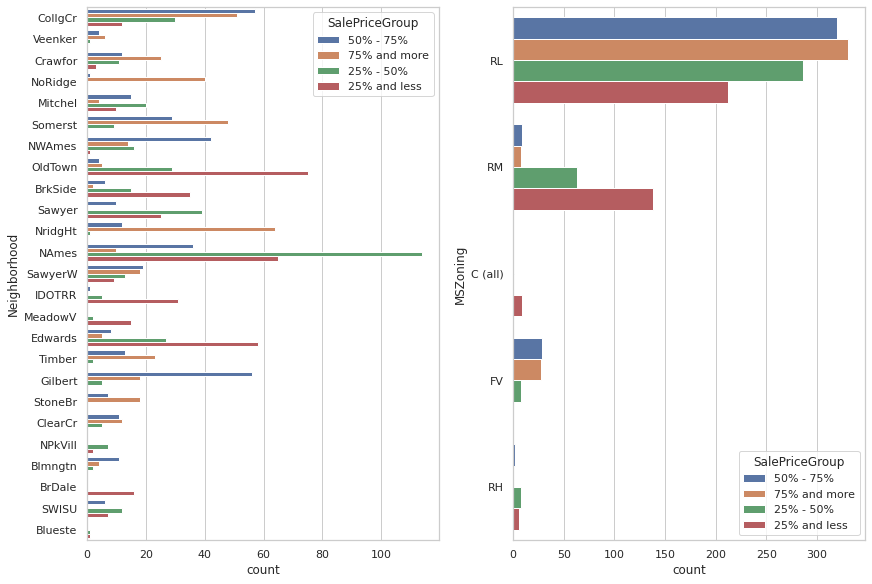

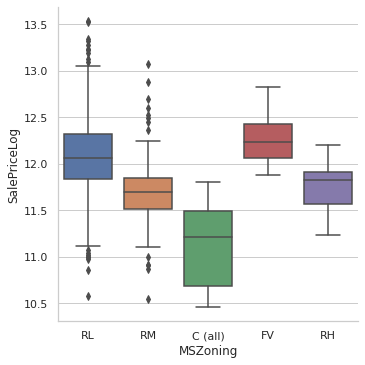

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='Neighborhood', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='MSZoning', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='MSZoning', y='SalePriceLog', kind='box');

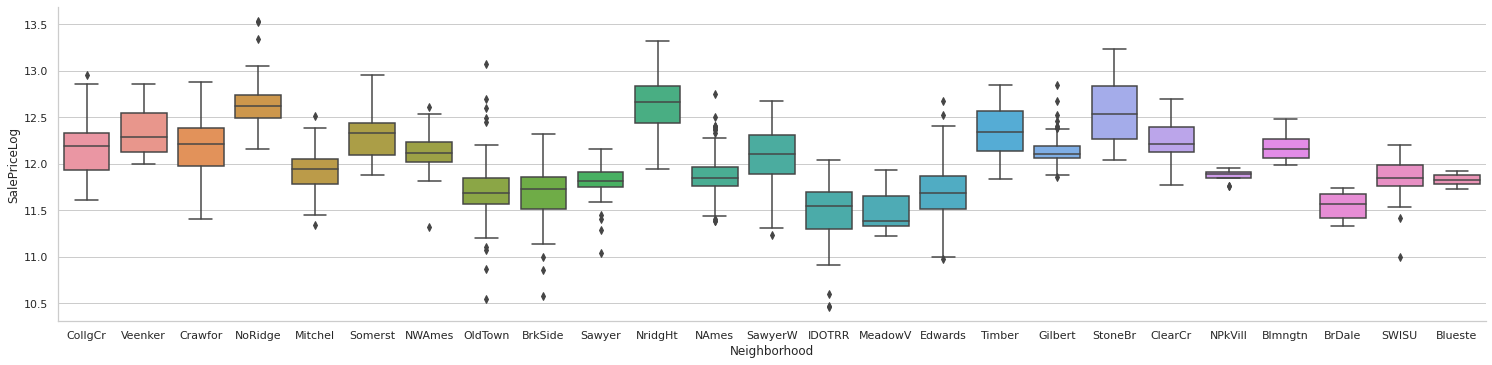

In [65]:
g = sns.catplot(data=full_df, x='Neighborhood', y='SalePriceLog', kind='box')
g.fig.set_figwidth(25);

Based on list of neighborhoods where expensive houses tended to be sold, we can call them **"elite" neighborhoods** and create a flag to mark them:

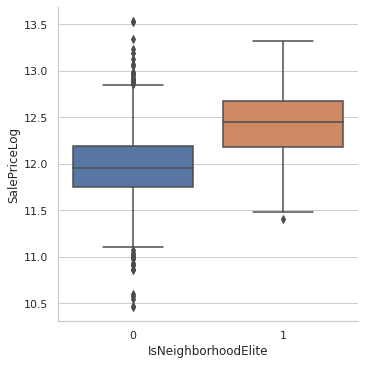

In [66]:
full_df['IsNeighborhoodElite'] = (full_df['Neighborhood'].isin(['NridgHt', 'CollgeCr', 'Crawfor', 'StoreBr', 'Timber'])) * 1

sns.catplot(data=full_df, x='IsNeighborhoodElite', y='SalePriceLog', kind='box');

Thare are 25 neighborhoods in total in our list. This is a lot of options which may bring some noice to models.

We can think about grouping neighborhoods into smaller number of groups based on the average house price (ala mean encoding):

In [67]:
full_df['SalePrice'].groupby(full_df['Neighborhood']).median().sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    119500.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

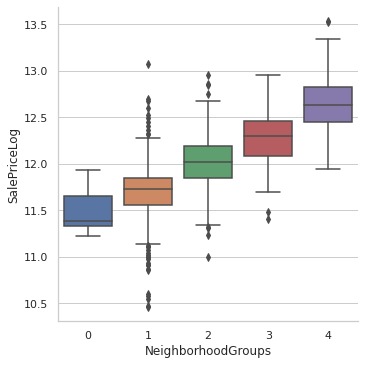

In [68]:
full_df['NeighborhoodGroups'] = full_df['Neighborhood'].map({
    'MeadowV': 0,
    'IDOTRR': 1,
    'BrDale': 1,
    'OldTown': 1,
    'Edwards': 1,
    'BrkSide': 1,
    'Sawyer': 1,
    'Blueste': 1,
    'SWISU': 2,
    'NAmes': 2,
    'NPkVill': 2,
    'Mitchel': 2,
    'SawyerW': 2,
    'Gilbert': 2,  
    'NWAmes': 2,   
    'Blmngtn': 2,  
    'CollgCr': 2,  
    'ClearCr': 3,  
    'Crawfor': 3,  
    'Veenker': 3,  
    'Somerst': 3,  
    'Timber': 3,   
    'StoneBr': 4, 
    'NoRidge': 4, 
    'NridgHt': 4,
})

sns.catplot(data=full_df, x='NeighborhoodGroups', y='SalePriceLog', kind='box');

SalePrice is beatifully going up as we expect!

**Condition1** and **Condition2** features represent additional location advantages or disadvantages:
- a lot might be adjacent or near off site park or forest (house sale price goes up)
- a lot might be adjacent or near noisy street or railroad (house sale price goes down)

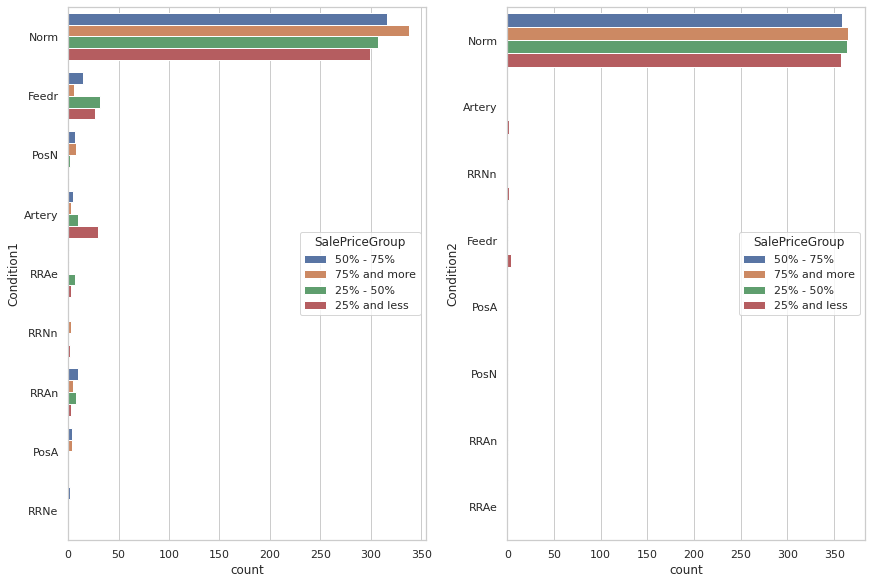

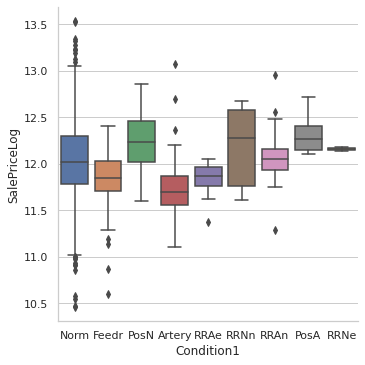

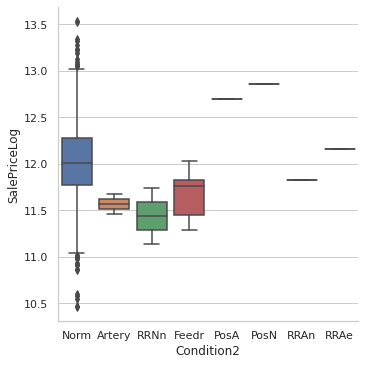

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='Condition1', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='Condition2', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='Condition1', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='Condition2', y='SalePriceLog', kind='box');

Since **Condition1** and **Condition2** describes the same set of conditions, we can merge them into a few flags:
- Is Adjacent to Arterial Street?
- Is Adjacent to Feeder Street?
- Is Adjacent to Railroad?
- Is Near to Feeder Street?
- Is Adjacent to Offsite Feature?
- Is Near to Offsite Feature?

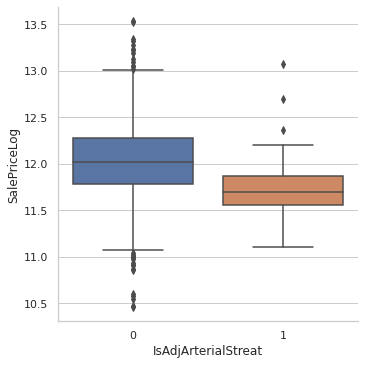

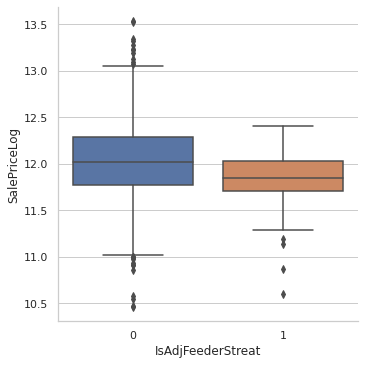

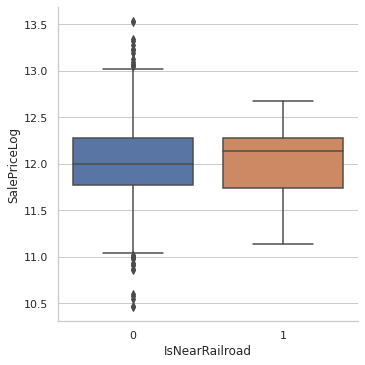

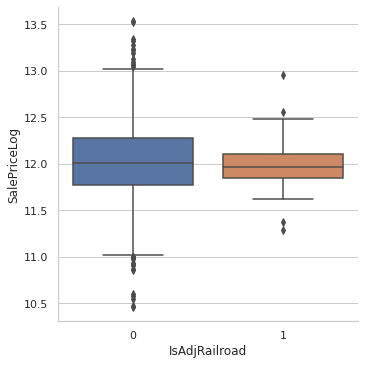

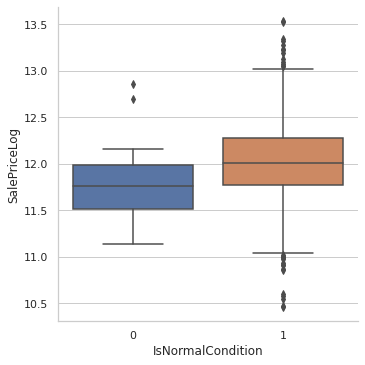

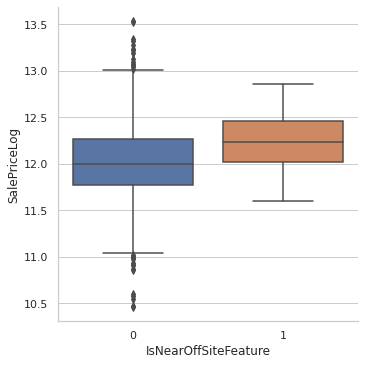

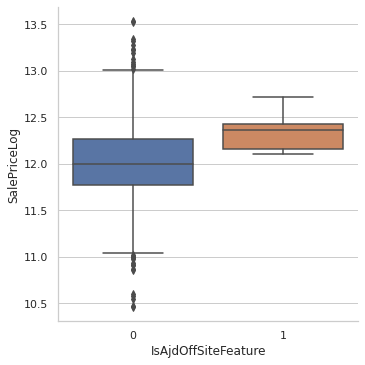

In [70]:
full_df['IsAdjArterialStreat'] = ((full_df['Condition1'] == 'Artery') | (full_df['Condition2'] == 'Artery')) * 1
full_df['IsAdjFeederStreat'] = ((full_df['Condition1'] == 'Feedr') | (full_df['Condition2'] == 'Feedr')) * 1
full_df['IsNormalCondition'] = ((full_df['Condition1'] == 'Norm') | (full_df['Condition2'] == 'Norm')) * 1
full_df['IsAjdOffSiteFeature'] = ((full_df['Condition1'] == 'PosA') | (full_df['Condition2'] == 'PosA')) * 1
full_df['IsNearOffSiteFeature'] = ((full_df['Condition1'] == 'PosN') | (full_df['Condition2'] == 'PosN')) * 1
full_df['IsNearRailroad'] = ((full_df['Condition1'].isin(['RRNn', 'RRNe'])) | (full_df['Condition2'].isin(['RRNn', 'RRNe']))) * 1
full_df['IsAdjRailroad'] = ((full_df['Condition1'].isin(['RRAn', 'RRAe'])) | (full_df['Condition2'].isin(['RRAn', 'RRAe']))) * 1

sns.catplot(data=full_df, x='IsAdjArterialStreat', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsAdjFeederStreat', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsNearRailroad', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsAdjRailroad', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsNormalCondition', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsNearOffSiteFeature', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsAjdOffSiteFeature', y='SalePriceLog', kind='box');

## Roof Properties



<img style="margin-left: 0" src="https://i.pinimg.com/originals/c7/88/e9/c788e90182e94319aecb6629ddfcede2.jpg" />

**Gable** and **hip** are two the most popular **roof styles** in the training set. The most popular **roof material** is composite shingles:

More Info:
- http://aroyalroofing.com/composite-shingles/
- https://www.cupapizarras.com/int/news/10-types-of-roofs/

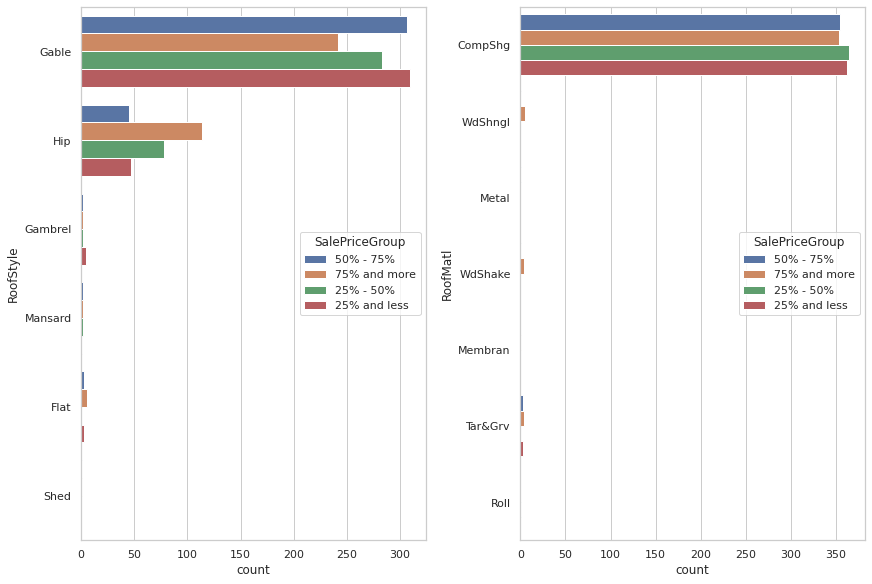

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='RoofStyle', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='RoofMatl', hue='SalePriceGroup', ax=ax[1]);

**Roof material** correlates with house prices.

Here is an overview of roofing materials:
- **Composite Shingle** - organic or fiberglass base that is saturated with asphalt, coated on the bottom side with asphalt, and the exposed surface impregnated with small chips of slate, schist, quartz, or ceramic granules. **The most popular option** of all roofing materials (5 dollars/$ft^2$, 15-40 years lifetime) 
- **Wood Shingle** - made from thin, wedge-shaped pieces of natural wood, such as cedar or yellow pine, which are sawn from logs (8.25 dollars/$ft^2$, 25-30 years lifetime)
- **Roll Roofing** -  is made from large rolls of the same material used in composite shingles. It is frequently used in covering of sheds and small shops rather than houses (**2.5 dollars/$ft^2$**, 5-10 years lifetime)
- **Built-Up Roofing (Tar & Grv)** - a layered roof that is created by alternating layers of roofing felt and waterproof materials such as fiberglass, and hot tar (4 dollars/$ft^2$, 20-30 years lifetime)
- **Wood Shake** - thicker material than wood shingles, and they can be expected to stand up better than wood shingles to weather and UV rays (13 dollars/$ft^2$, 35-40 years)
- **Metal Roofing** - made from large steel panels laid on the roof deck with the seams overlapping in raised ridges that run vertically along the roof slope (13.6 dollars/$ft^2$, 30-50 years lifetime)
- **Clay Tile** - made from terracotta clay, but there are also ceramic tiles roofs (17.5 dollars/$ft^2$, 100 years lifetime)

**Wood** seem to be the most expensive material. 

More Info:
- https://www.inexroofingco.com/services/wood-shakes/
- https://nrc4help.com/tar-gravel-roof
- https://www.thespruce.com/rolled-roofing-1821945
- https://www.archtoolbox.com/materials-systems/thermal-moisture-protection/flat-roof-membranes.html
- https://www.diorconstruction.com/4-benefits-of-wood-shake-roofing/
- https://www.thespruce.com/best-roofing-materials-for-longevity-1821951

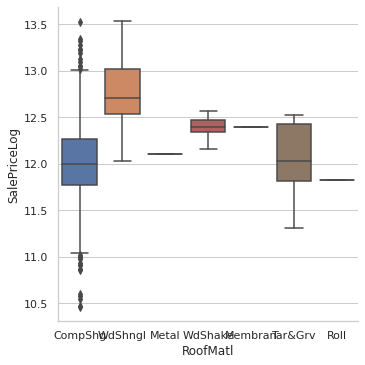

In [72]:
sns.catplot(data=full_df, x='RoofMatl', y='SalePriceLog', kind='box');

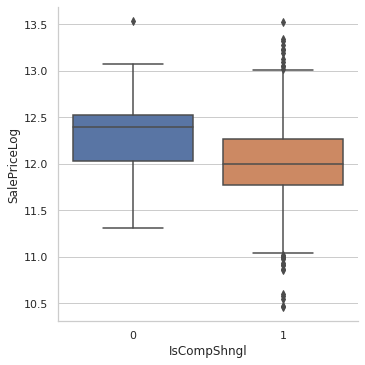

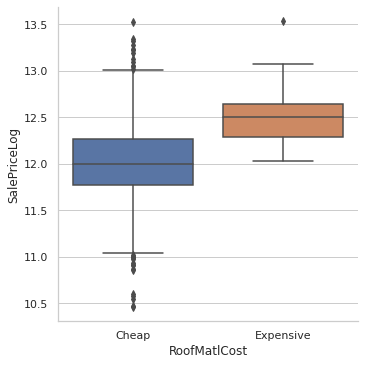

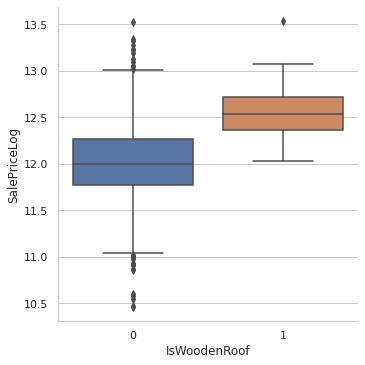

In [73]:
full_df['RoofMatlCost'] = full_df['RoofMatl'].map({
    'CompShg': 'Cheap',
    'WdShake': 'Expensive',
    'ClyTile': 'Expensive',
    'WdShngl': 'Expensive',
    'Roll': 'Cheap',
    'Metal': 'Expensive',
    'Membran': 'Cheap',
    'Tar&Grv': 'Cheap',
})

full_df['IsWoodenRoof'] = full_df['RoofMatl'].map({
    'CompShg': 0,
    'WdShake': 1,
    'ClyTile': 0,
    'WdShngl': 1,
    'Roll': 0,
    'Metal': 0,
    'Membran': 0,
    'Tar&Grv': 0,
})

full_df['IsCompShngl'] = full_df['RoofMatl'].map({
    'CompShg': 1,
    'WdShake': 0,
    'ClyTile': 0,
    'WdShngl': 0,
    'Roll': 0,
    'Metal': 0,
    'Membran': 0,
    'Tar&Grv': 0,
})

sns.catplot(data=full_df, x='IsCompShngl', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='RoofMatlCost', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsWoodenRoof', y='SalePriceLog', kind='box');

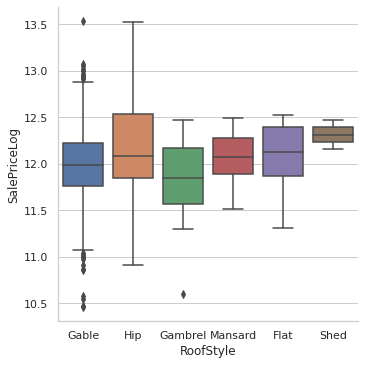

In [74]:
sns.catplot(data=full_df, x='RoofStyle', y='SalePriceLog', kind='box');

**Gable** and **hip** are the most popular choices. Let's group our house roof styles by popularity:

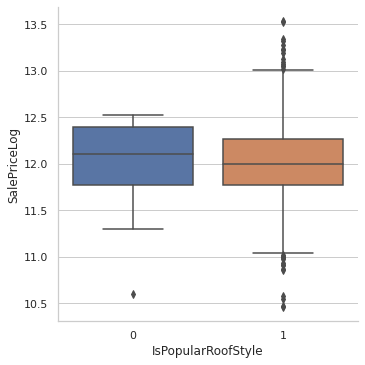

In [75]:
full_df['IsPopularRoofStyle'] = full_df['RoofStyle'].isin(['Hip', 'Gable']) * 1

sns.catplot(data=full_df, x='IsPopularRoofStyle', y='SalePriceLog', kind='box');

## House Exterior Coverage

<img style="margin-left: 0" src="https://i.pinimg.com/originals/f7/89/62/f7896244b88d71a376c8bfb3f3a7d95f.jpg" width="600px" />

**Exterior coverage** is a material that was used to decorate raw house exterior. Here is type of material we see in the dataset:
- Asbestos Shingles
- Asphalt Shingles
- Brick Common
- Brick Face
- Cinder Block
- Cement Board
- Hard Board
- Imitation Stucco
- Metal Siding
- Plywood
- PreCast	
- Stone
- Stucco
- Vinyl Siding
- Wood Siding
- Wood Shingles
- Other

More Info:
- https://www.homestratosphere.com/types-exterior-siding-home/

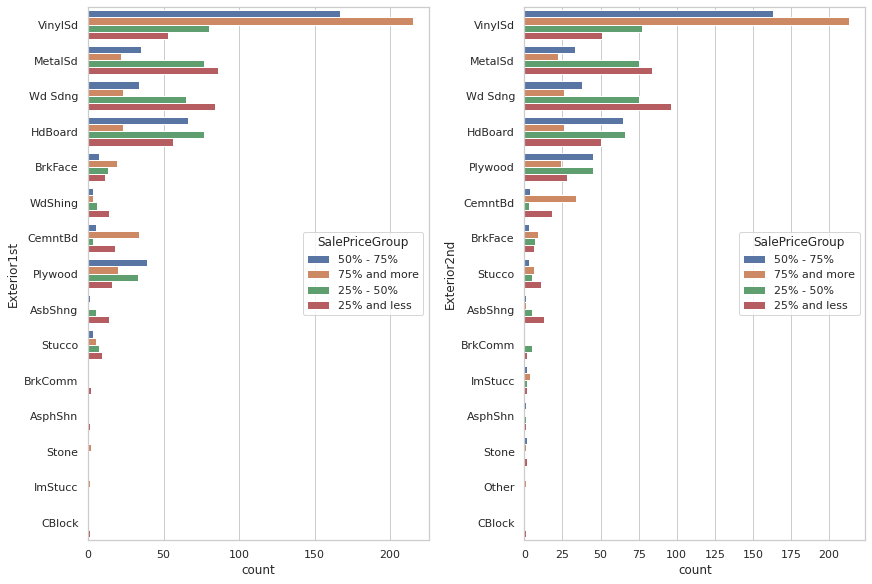

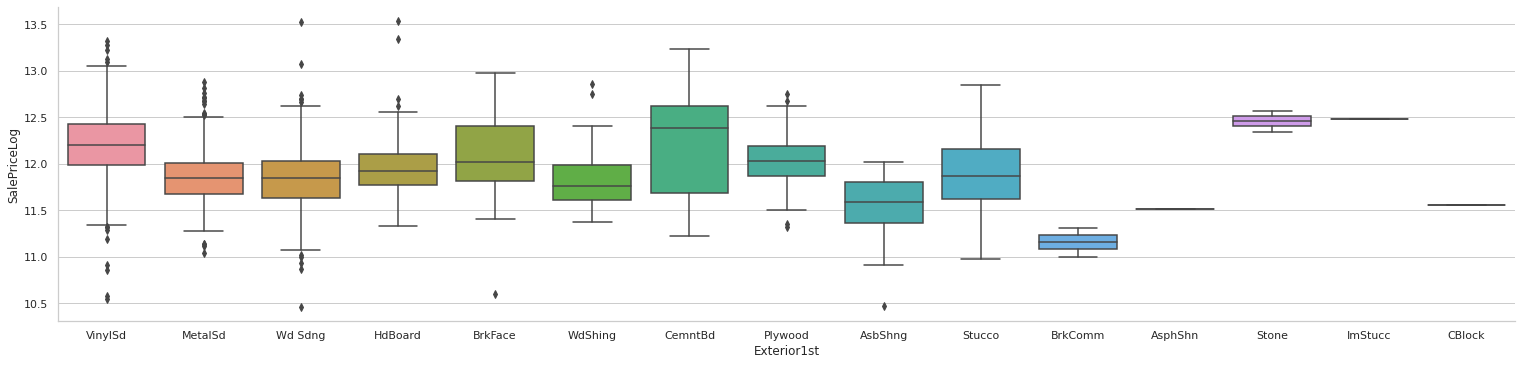

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='Exterior1st', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='Exterior2nd', hue='SalePriceGroup', ax=ax[1])

g = sns.catplot(data=full_df, x='Exterior1st', y='SalePriceLog', kind='box')
g.fig.set_figwidth(25);

todo: review in details exterior coverages and their affect on the house price

**75%+ tier** houses had mostly good or excellent exterior quality. They also had average or good conditions.

Houses from **50%- tier** had mostly average quality and average condition.

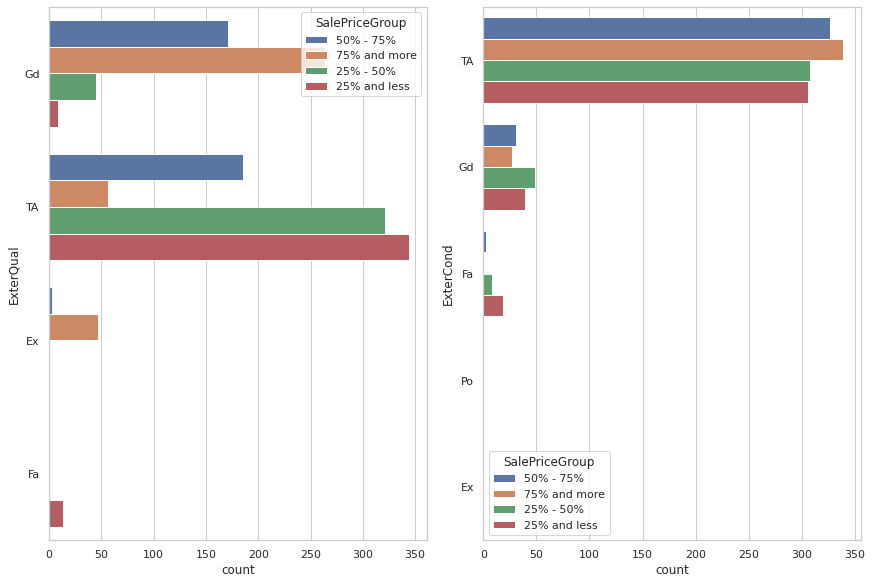

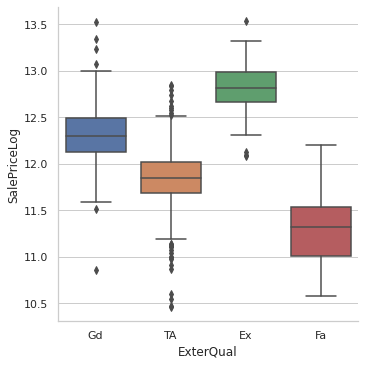

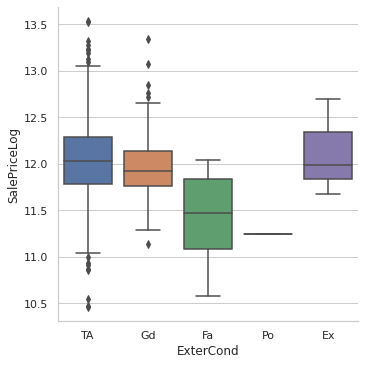

In [77]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='ExterQual', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='ExterCond', hue='SalePriceGroup', ax=ax[1])

sns.catplot(data=full_df, x='ExterQual', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='ExterCond', y='SalePriceLog', kind='box');

Let's see how we can define **Is External Condition Good** flag and also combine **ExterQual** and **ExterCond** features:

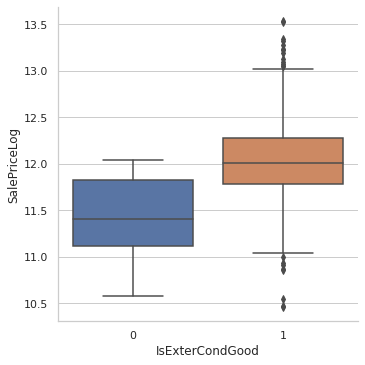

In [78]:
full_df['IsExterCondGood'] = full_df['ExterCond'].map({'Po': 0, 'Fa': 0, 'TA': 1, 'Gd': 1, 'Ex': 1})

sns.catplot(data=full_df, x='IsExterCondGood', y='SalePriceLog', kind='box');

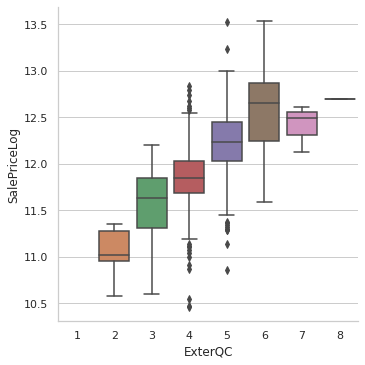

In [79]:
full_df['ExterQC'] = full_df['ExterQualEnc'] + full_df['ExterCondEnc']

sns.catplot(data=full_df, x='ExterQC', y='SalePriceLog', kind='box');

## Masonry Veneer

<img style="margin-left: 0" src="https://img.tfd.com/architecture/f0619-02.png" width="300px" />

**Masonry Veneer** -  is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

Most of the houses did not have **masonry veneers**. **Stone** and **brick face** material prevails in 50%+ tier. Cheaper houses eigher did not have **masonry veneers** at all or had it covered with **brick common** material:

More Info:
- https://www.wisegeek.com/what-is-masonry-veneer.htm

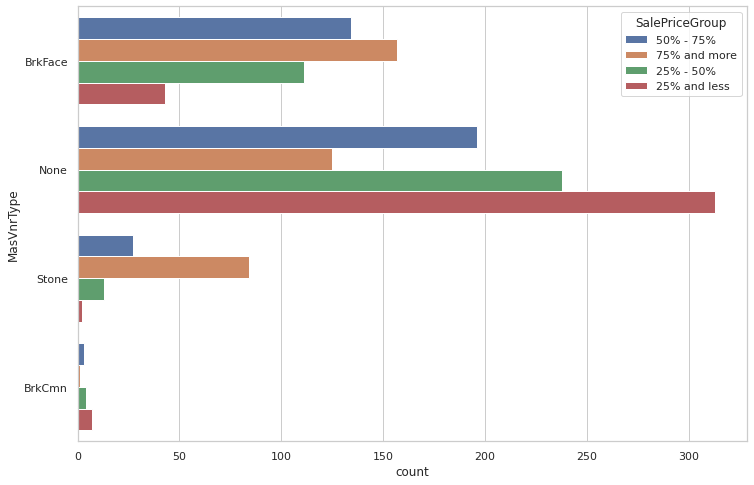

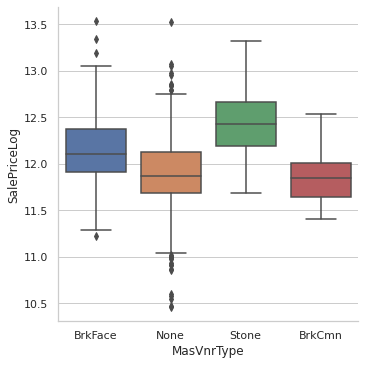

In [80]:
sns.countplot(data=full_df, y='MasVnrType', hue='SalePriceGroup')
sns.catplot(data=full_df, x='MasVnrType', y='SalePriceLog', kind='box');

**Mansory veneer area** seems to correlate with the **SalePrice**. Similarly, let's try to **bin** the area to reduce possible noice in the feature values (we want to separate houses without mansory veneer from ones that had it in small amount):

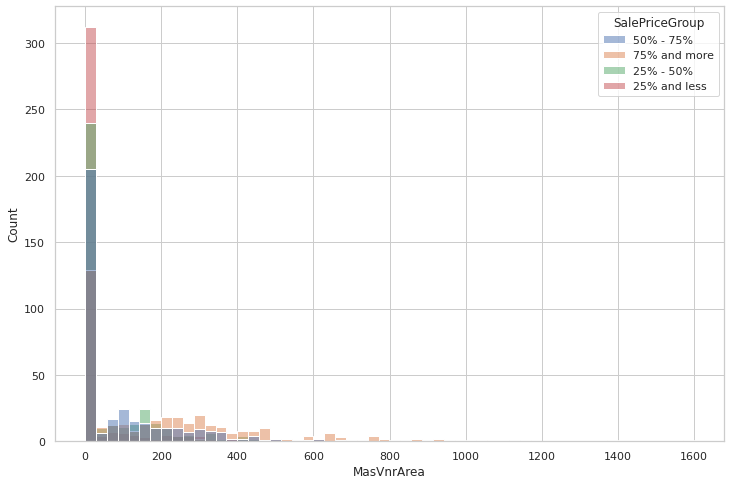

In [81]:
sns.histplot(data=full_df, x='MasVnrArea', hue='SalePriceGroup');

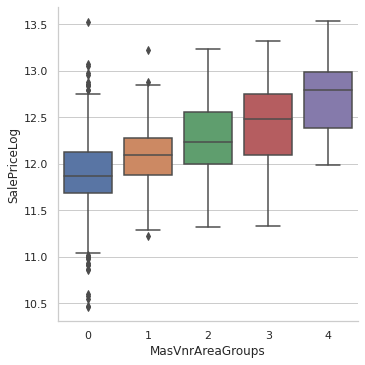

In [82]:
full_df['MasVnrAreaGroups'] = pd.cut(full_df['MasVnrArea'], bins=[-1, 1, 200, 400, 800, 1700], labels=[0, 1, 2, 3, 4])
sns.catplot(data=full_df, x='MasVnrAreaGroups', y='SalePriceLog', kind='box');

## Heating, Air Condition and Electrical Systems, Utilities

<img style="margin-left: 0" src="https://www.longrefrigeration.com/wp-content/uploads/2018/01/Depositphotos_84681734_m-2015.jpg" width="600px" />

**Heating Types** does differentiate samples with sale price below the mean.

Wall, gravity, floor furneses and other heating were installed in houses that cheaper than 50% tier.

It seems like the mentioned heating systems are old fashion. 

Here is the YearBuilt ranges:
- Grav - 1910-1941
- Floor - 1949
- OthW - 1872-1917
- Wall - 1945-1952
- GasW - 1880-1970
- GasA - 1875-2010

Most houses with SalePrice > 50% have from excellent to **average quality** of heating. **Lower quality** types includes mostly houses from < 50% tier.

More Info: 
- https://www.nachi.org/gravity-furnace-inspection.htm
- https://www.billhowe.com/blog/what-is-wall-furnace
- https://sandium.com/hvac-technology/all-you-need-to-know-about-floor-furnace.html

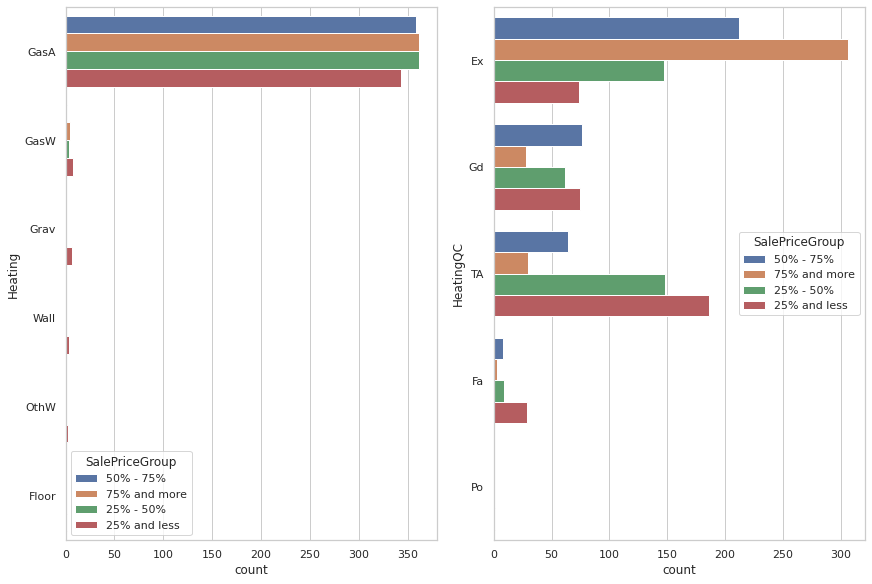

In [83]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='Heating', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='HeatingQC', hue='SalePriceGroup', ax=ax[1]);

Based on this information, let's engineer new features that:
- indicate gas-based heating systems (modern type of heating)
- simplify heating ranking and introduce **IsHeatingGood** flag

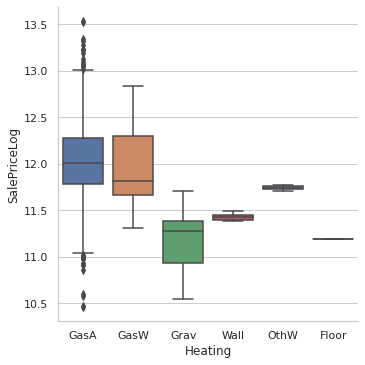

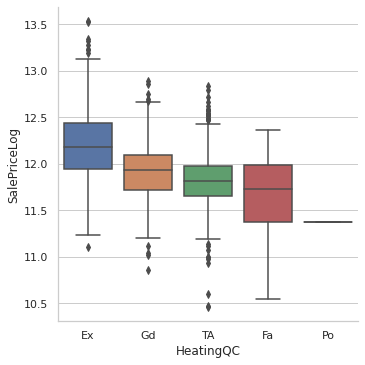

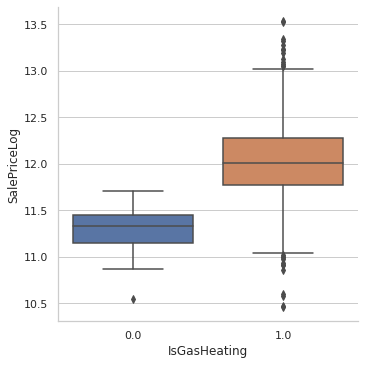

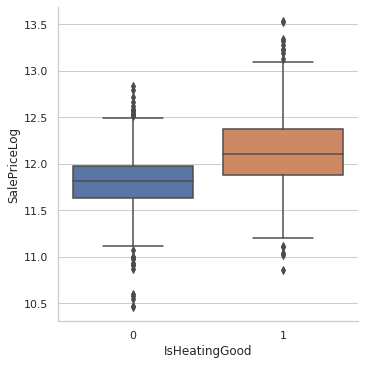

In [84]:
full_df['IsGasHeating'] = full_df['Heating'].map({'GasA': 1, 'GasW': 1, 'Grav': 0, 'Wall': 0, 'OtherW': 0, 'Floor': 0})
full_df['IsHeatingGood'] = full_df['HeatingQC'].map({'Po': 0, 'Fa': 0, 'TA': 0, 'Gd': 1, 'Ex': 1})

sns.catplot(data=full_df, x='Heating', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='HeatingQC', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsGasHeating', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsHeatingGood', y='SalePriceLog', kind='box');

**Central AC** seems to be an popular house feature. Most of the houses from >50% tier had it. It was not installed in cheap (<25% tier) houses.

More Info:
- https://www.thisoldhouse.com/heating-cooling/21018992/read-this-before-you-install-central-air-conditioning

Most of the houses have Standard Circuit Breakers type of **Electricity**. Houses from >50% tier dominates there. The rest of options (which is fuse boxes) are hold by <50% houses. Fuse Boxes were normally installed in old-built houses.

More Info:
- http://www.icanfixupmyhome.com/Understanding_Home_Wiring.html
- https://www.thespruce.com/fuses-and-fuse-boxes-101-4122558

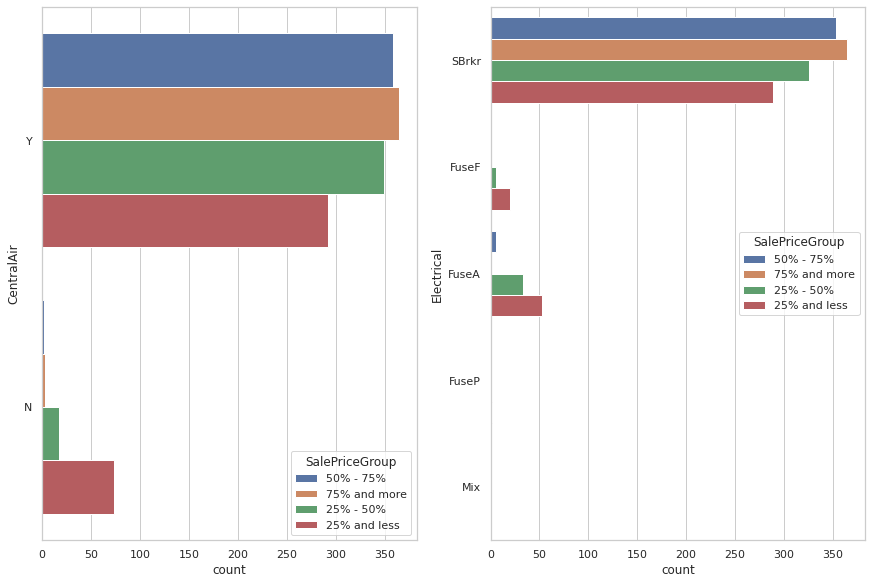

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='CentralAir', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='Electrical', hue='SalePriceGroup', ax=ax[1]);

**Electrical** feature seems to have more information that we need. It can be reduced to a flag features that indicated whenever a house had modern electrical breakers or old-fashion fuse boxes:

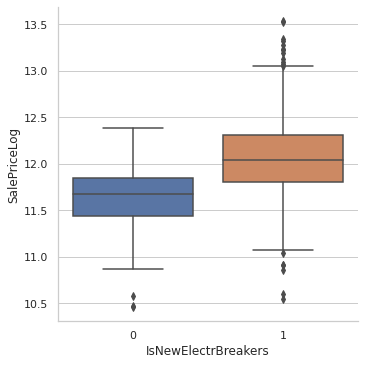

In [86]:
full_df['IsNewElectrBreakers'] = full_df['Electrical'].map({'SBrkr': 1, 'FuseF': 0, 'FuseA': 0, 'FuseP': 0, 'Mix': 0})

sns.catplot(data=full_df, x='IsNewElectrBreakers', y='SalePriceLog', kind='box');

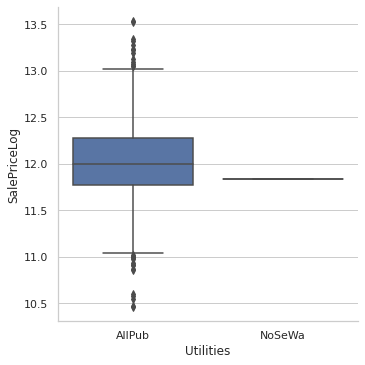

In [87]:
sns.catplot(data=full_df, x='Utilities', y='SalePriceLog', kind='box');

In [88]:
full_df[full_df['Utilities'] != 'AllPub']

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
944      1344         0          0  None             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... RoofMatlCost IsWoodenRoof  \
944           No       111.0       354.0  ...        Cheap            0   

     IsCompShngl  IsPopularRoofStyle IsExterCondGood  ExterQC  \
944            1                   1               1        4   

    MasVnrAreaGroups IsGasHeating IsHeatingGood IsNewElectrBreakers  
944                3          1.0             1                   0  

[1 rows x 173 columns]

Most of the houses have "AllPub" **Utilities** feature has only one value in the dataset. There are a few NaN values and one "NoSeWa". It should be safe to drop this feature/column.

## Kitchen Properties

<img style="margin-left: 0" src="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/ph163819-priority-1580934887.jpg" width="600px" />

**Kitchen** is an important part of any house. There are two metrics that decribe kitchens:

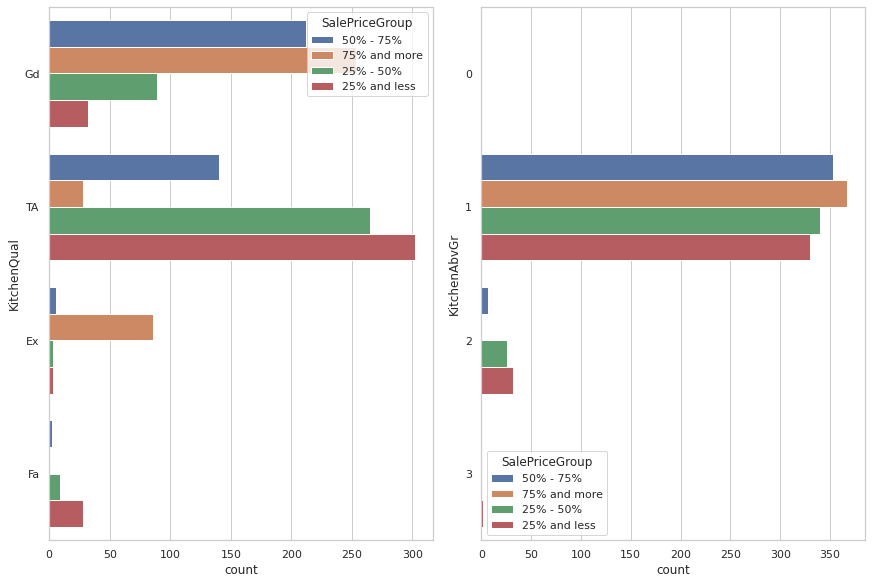

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='KitchenQual', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='KitchenAbvGr', hue='SalePriceGroup', ax=ax[1]);

We can think about **single metric** to combine kitchen number and quality. With a help of binning, we can divide all houses into "Bad Quality" and "Good Quality" kitchens:

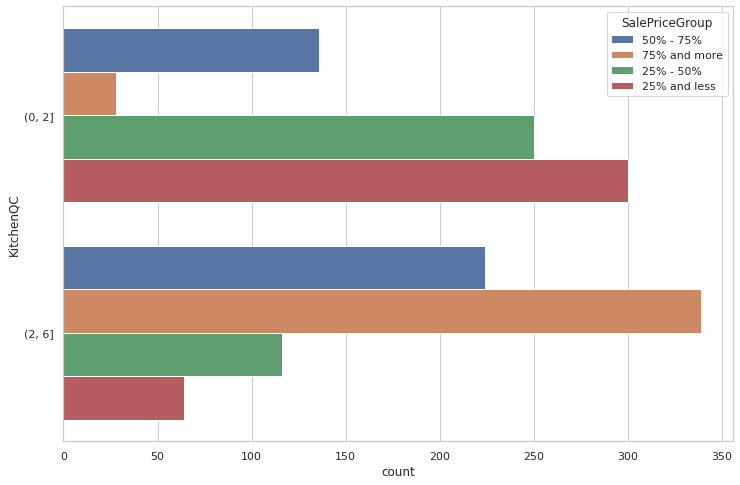

In [90]:
full_df['KitchenQC'] = pd.cut(full_df['KitchenQualEnc'] * full_df['KitchenAbvGr'], [0, 2, 6])

sns.countplot(data=full_df, y='KitchenQC', hue='SalePriceGroup');

## Bathroom Properties

<img style="margin-left: 0" src="https://na.rdcpix.com/953932278/9ab1219892c704d4811c173a86816eb4w-c0xd-w685_h860_q80.jpg" />

**Bathrooms** are also important and there two types of bathrooms: 
- full bathrooms - a sink, a shower, a bathtub, and a toilet
- and half bathrooms - a toilet and a sink only

**Bathrooms** can be located **above ground** or in **the basement**. Large part of houses did not have bathrooms in basements. Half bathrooms in the basement is rare and only some houses had full bathrooms in their basements.

More Information: 
* https://www.realtor.com/advice/sell/if-i-take-out-the-tub-does-a-bathroom-still-count-as-a-full-bath
* https://www.thetruthaboutrealty.com/half-bath-vs-full-bath-wheres-the-value/

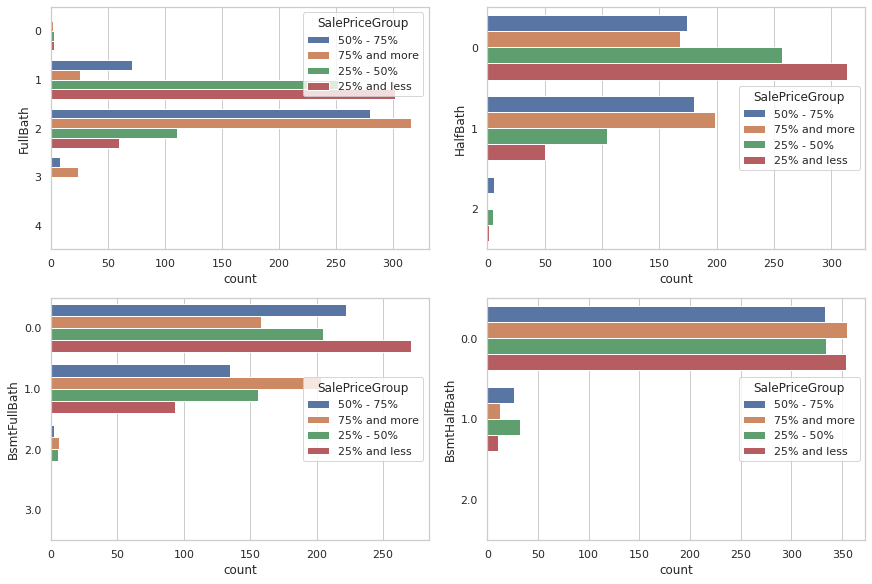

In [91]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

sns.countplot(data=full_df, y='FullBath', hue='SalePriceGroup', ax=ax[0, 0])
sns.countplot(data=full_df, y='HalfBath', hue='SalePriceGroup', ax=ax[0, 1])

sns.countplot(data=full_df, y='BsmtFullBath', hue='SalePriceGroup', ax=ax[1, 0])
sns.countplot(data=full_df, y='BsmtHalfBath', hue='SalePriceGroup', ax=ax[1, 1]);

It's typical to say that house contains "one and half bathrooms", so we can think about a simple **bathroom formula** to sum up a house bathrooms:

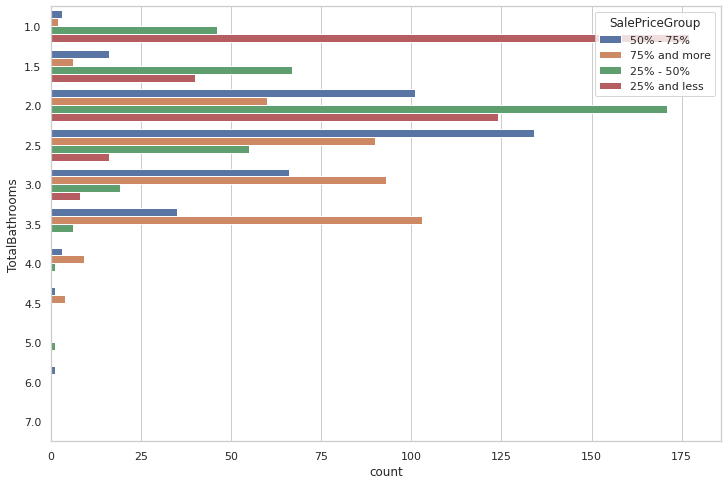

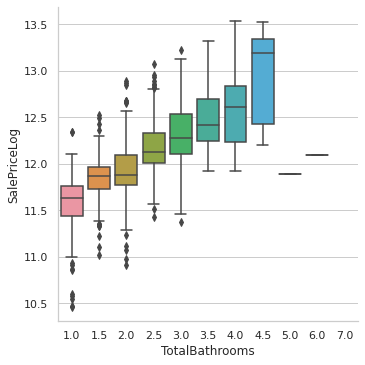

In [92]:
full_df['TotalBathrooms'] = full_df['FullBath'] + (0.5 * full_df['HalfBath']) + \
                                full_df['BsmtFullBath'] + (0.5 * full_df['BsmtHalfBath'])

sns.countplot(data=full_df, y='TotalBathrooms', hue='SalePriceGroup')
sns.catplot(data=full_df, x='TotalBathrooms', y='SalePriceLog', kind='box');

Sinlge **TotalBathrooms** feature correlates well with **SalePrice**. Sure thing! Everyone wants to have a few bathrooms 😄

## Garage Properties

<img style="margin-left: 0" src="https://www.deldenmfg.com/images/homepage-slideshow/home5.jpg" width="600px" />

Attached and Builtin **garage types** dominate among expensive houses (>50% tier). Their garages commonly were built to contain 2 or 3 cars. 
Detached, CarPort types dominates among cheap houses (<50% tier). Their garage capacity is 1 car. No garages are also dominates among cheap houses.

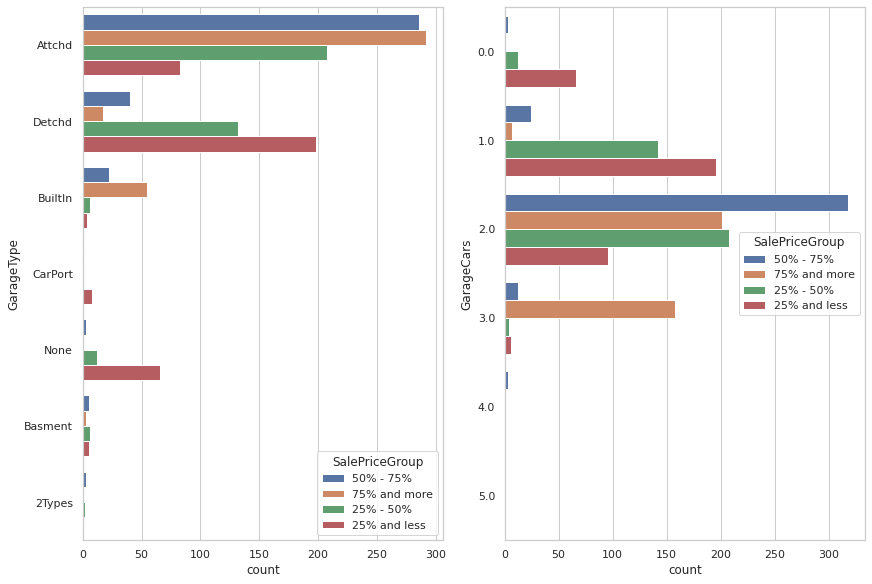

In [93]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='GarageType', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='GarageCars', hue='SalePriceGroup', ax=ax[1]);

Also, we can see a correlation between **garage car** capacity and house **sale price**:

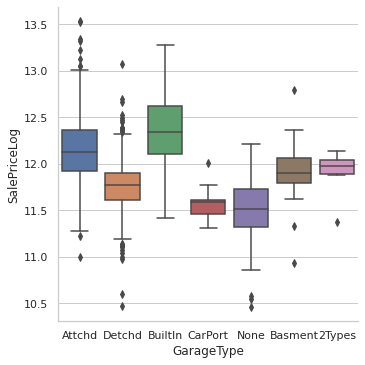

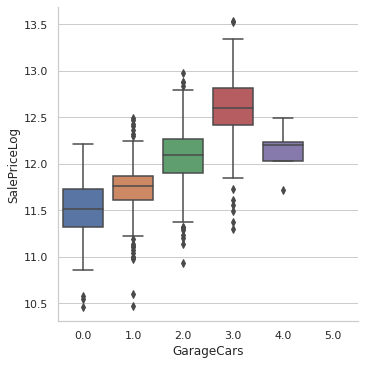

In [94]:
sns.catplot(data=full_df, x='GarageType', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='GarageCars', y='SalePriceLog', kind='box');

Most of garages were in **average** condition and quality:

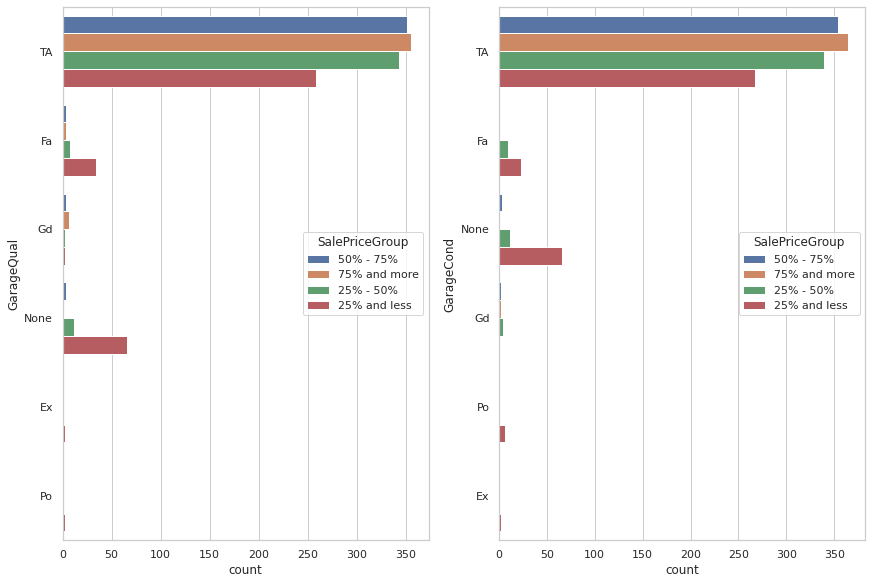

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=full_df, y='GarageQual', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='GarageCond', hue='SalePriceGroup', ax=ax[1]);

To reduce noice in Garage Quality and Condition feature, we reduce them to flags:

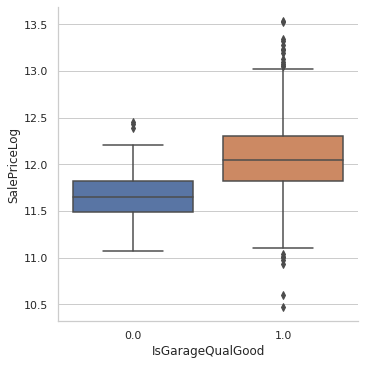

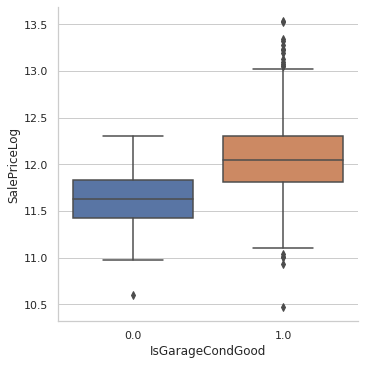

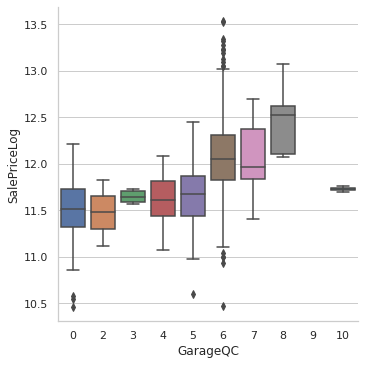

In [96]:
full_df['IsGarageCondGood'] = full_df['GarageCond'].map({'Po': 0, 'Fa': 0, 'TA': 1, 'Gd': 1, 'Ex': 1})
full_df['IsGarageQualGood'] = full_df['GarageQual'].map({'Po': 0, 'Fa': 0, 'TA': 1, 'Gd': 1, 'Ex': 1})
full_df['GarageQC'] = full_df['GarageQualEnc'] + full_df['GarageCondEnc']

sns.catplot(data=full_df, x='IsGarageQualGood', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='IsGarageCondGood', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='GarageQC', y='SalePriceLog', kind='box');

**Finished Garages** were more expensive than unfinished ones. Most of the expensive houses (>50% tier) have finished garages or roughly finished. 

**Unfinished garages** were sold with cheap houses (<50% tier).

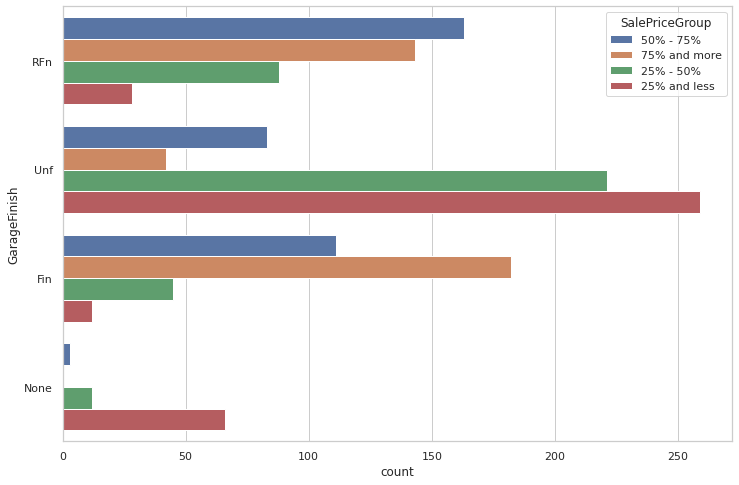

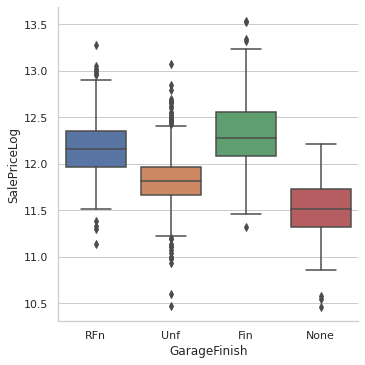

In [97]:
sns.countplot(data=full_df, y='GarageFinish', hue='SalePriceGroup')
sns.catplot(data=full_df, x='GarageFinish', y='SalePriceLog', kind='box');

**Garage area** correlates with **SalePrice**. It correlates with **GarageCars** capacity as well (the more garage area, the bigger cars it can hold):

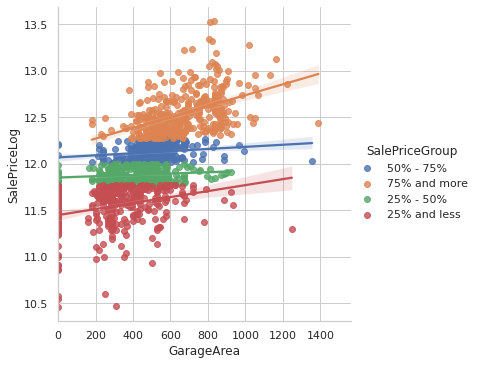

In [98]:
sns.lmplot(data=full_df, x='GarageArea', y='SalePriceLog', hue='SalePriceGroup');

**Garage area per car** doesn't seem to correlate much with **SalePrice**:

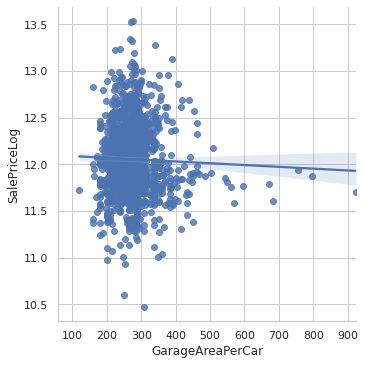

In [99]:
full_df['GarageAreaPerCar'] = full_df['GarageArea'] / full_df['GarageCars']

sns.lmplot(data=full_df, x='GarageAreaPerCar', y='SalePriceLog');

## Wood Deck

<img style="margin-left: 0" src="https://padeckbuilder.com/wp-content/uploads/2016/03/Cumaru-deck.jpg" width="600px" />

**Deck** is a platform built above the ground and connected to the main building. The average deck area is between 200-300 $ft^2$.

More Info:
- https://www.landscapingnetwork.com/decks/size.html

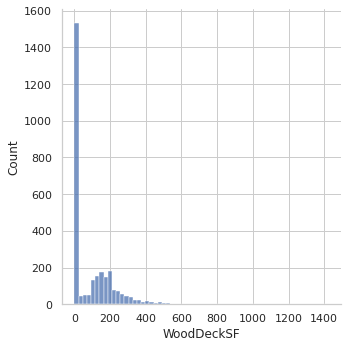

In [100]:
sns.displot(full_df['WoodDeckSF']);

Most of the houses did **not have** wooden decks. Since we don't have any other information except deck area, we can categorize all decks by size:

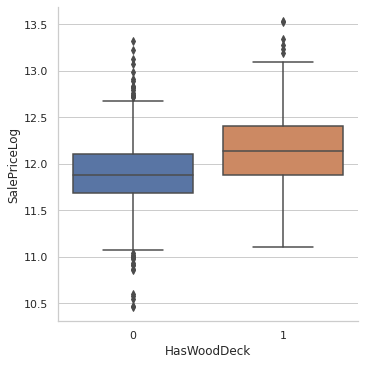

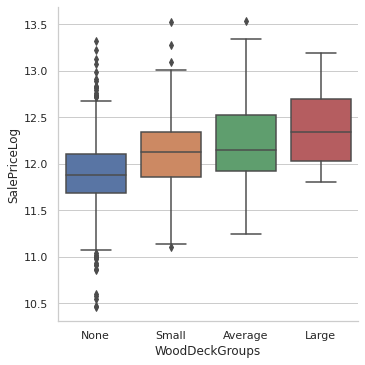

In [101]:
full_df['HasWoodDeck'] = (full_df['WoodDeckSF'] > 0) * 1
full_df['WoodDeckGroups'] = pd.cut(full_df['WoodDeckSF'], bins=[-1, 1, 200, 500, 2000], labels=['None', 'Small', 'Average', 'Large'])

sns.catplot(data=full_df, x='HasWoodDeck', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='WoodDeckGroups', y='SalePriceLog', kind='box');

**WoodDeckGroups** gives more information about price distribution then **HasWoodDeck**  flag.

## Porches

**Porch** is a room or gallery located in front of an entrance of a building. Our training dataset has the whole four types of porches:
- Open Porch
- Enclosed Porch
- Three Season Porch
- Screen Porch

From the distribution plots, we can see that **open porch** is the **most common** type and **three season** one is the **most rare**. Also, most of homes had one porch and 317 lots had 2 porches and only 5 houses had 3 porches:

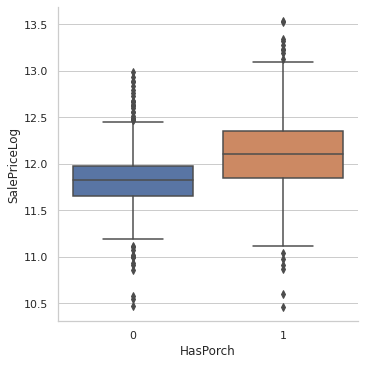

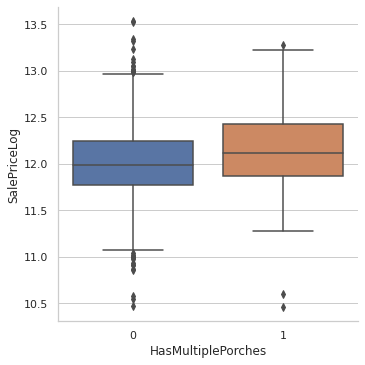

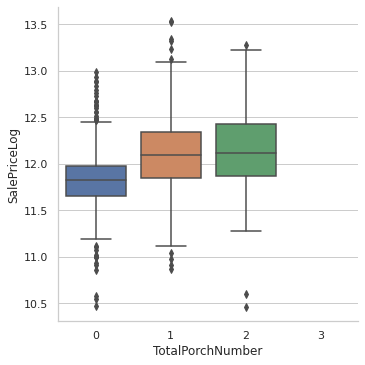

In [102]:
full_df['TotalPorchNumber'] = (full_df['OpenPorchSF'] > 0) * 1 +(full_df['EnclosedPorch'] > 0) * 1 + (full_df['3SsnPorch'] > 0) * 1 + (full_df['ScreenPorch'] > 0) * 1
full_df['HasPorch'] = (full_df['TotalPorchNumber'] > 0) * 1
full_df['HasMultiplePorches'] = (full_df['TotalPorchNumber'] > 1) * 1

sns.catplot(data=full_df, x='HasPorch', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='HasMultiplePorches', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='TotalPorchNumber', y='SalePriceLog', kind='box');

### Open Porch
<img style="margin-left: 0" src="https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F24%2F2017%2F03%2Fbefore-after-porch-outdoor-living-room-porch-2395402-1.jpg&q=85" width="600px" />

**Open Porch** is the most common type of porches. Its distribution is **right** skewed:

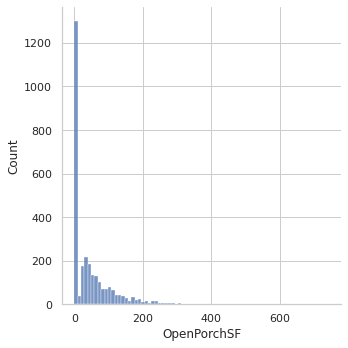

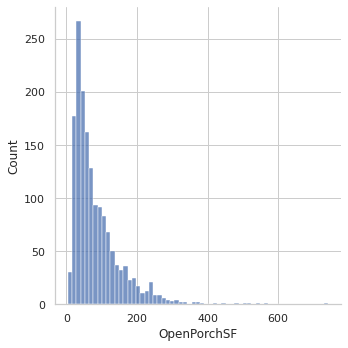

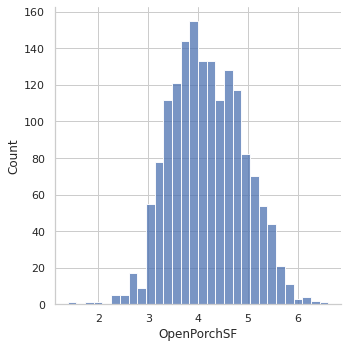

In [103]:
sns.displot(full_df['OpenPorchSF'])
sns.displot(full_df[full_df['OpenPorchSF'] > 0]['OpenPorchSF'])
sns.displot(np.log(full_df[full_df['OpenPorchSF'] > 0]['OpenPorchSF']));

In [104]:
full_df[full_df['OpenPorchSF'] > 0]['OpenPorchSF'].describe()

count    1619.000000
mean       85.185917
std        69.913548
min         4.000000
25%        38.500000
50%        63.000000
75%       110.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

Based on the area distribution, we can group open porches:

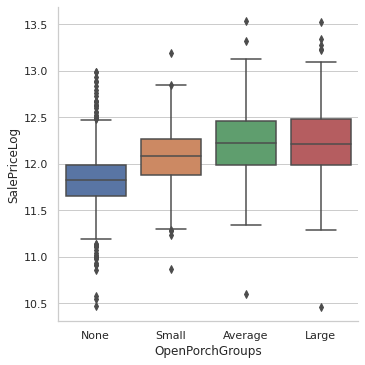

In [105]:
full_df['OpenPorchGroups'] = pd.cut(full_df['OpenPorchSF'], bins=[-1, 1, 40, 70, 1000], labels=['None', 'Small', 'Average', 'Large'])

sns.catplot(data=full_df, x='OpenPorchGroups', y='SalePriceLog', kind='box');

### Enclosed Porch

<img style="margin-left: 0" src="https://media.angieslist.com/s3fs-public/styles/widescreen_large/public/porch.jpg?itok=yX_vZdbw" width="600px" />

More Info:
- https://www.medfordoregonroofers.com/blog/construction-services/what-are-the-benefits-of-enclosed-porches/

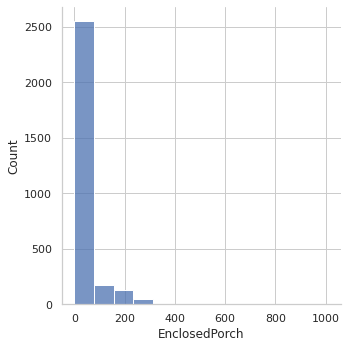

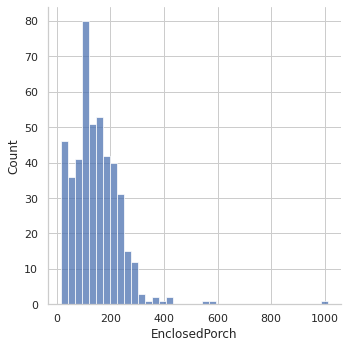

In [106]:
sns.displot(full_df['EnclosedPorch'])
sns.displot(full_df[full_df['EnclosedPorch'] > 0]['EnclosedPorch']);

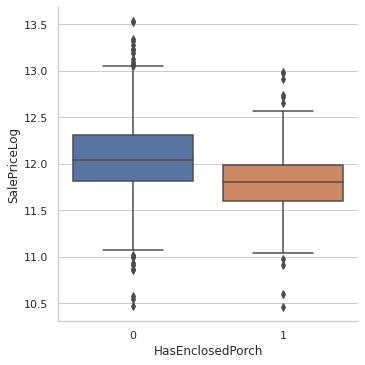

In [107]:
full_df['HasEnclosedPorch'] = (full_df['EnclosedPorch'] > 0) * 1

sns.catplot(data=full_df, x='HasEnclosedPorch', y='SalePriceLog', kind='box');

### Three Season Porch

<img style="margin-left: 0" src="https://lecybros.com/wp-content/uploads/2018/01/photo-009.jpg?fd06b2" width="600px" />

A **three season porch** is an enclosed addition to a house, and is oftentimes called a sun room. Unlike a four season porch, the three season porch is not insulated (it might be chilly to be there in winter).

More Info:
- https://northfieldconstruction.com/tips-for-building-a-three-season-porch/

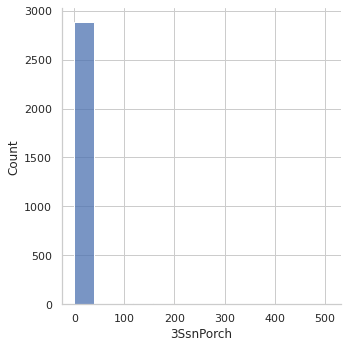

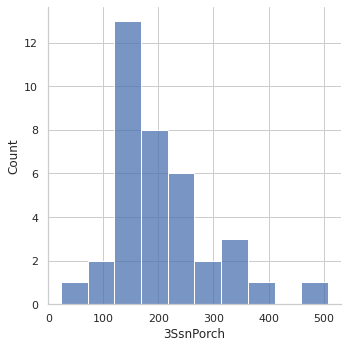

In [108]:
sns.displot(full_df['3SsnPorch'])
sns.displot(full_df[full_df['3SsnPorch'] > 0]['3SsnPorch']);

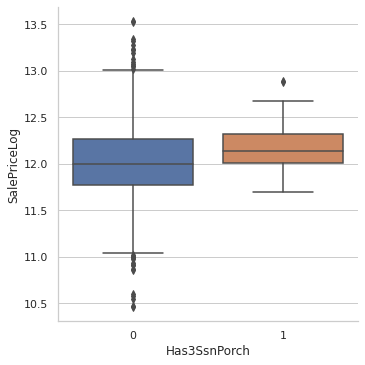

In [109]:
full_df['Has3SsnPorch'] = (full_df['3SsnPorch'] > 0) * 1

sns.catplot(data=full_df, x='Has3SsnPorch', y='SalePriceLog', kind='box');

### Screen Porch

<img style="margin-left: 0" src="https://cdnassets.hw.net/65/55/7098b3b74a659c0e0e47e2a48822/figure-00.jpg" width="600px" />

A **screened porch** is a type of porch on or near the exterior of a house that has been covered by window screens in order to hinder insects, debris, and other undesirable objects from entering the area inside the screen

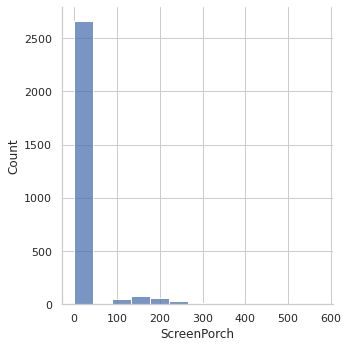

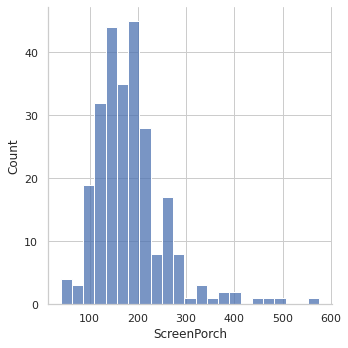

In [110]:
sns.displot(full_df['ScreenPorch'])
sns.displot(full_df[full_df['ScreenPorch'] > 0]['ScreenPorch']);

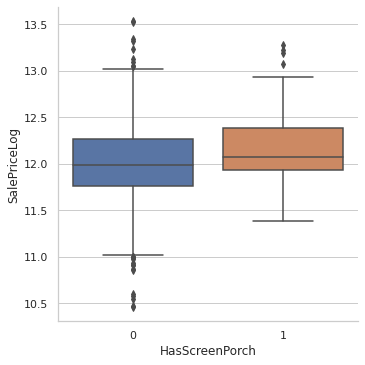

In [111]:
full_df['HasScreenPorch'] = (full_df['ScreenPorch'] > 0) * 1

sns.catplot(data=full_df, x='HasScreenPorch', y='SalePriceLog', kind='box');

## Fireplaces
<img style="margin-left: 0" src="https://www.fpwhs.com/shop/wp-content/uploads/Skope-E135-LOW.jpg" width="600px" />

Most of the **cheap houses** (<50%) did **not have fireplaces** or **have one** (most of the them were in **good or below avarage quality**). 

Most of the **expensive houses** have **1 or 2 fireplaces** with e**xcellent, good or average quality**.

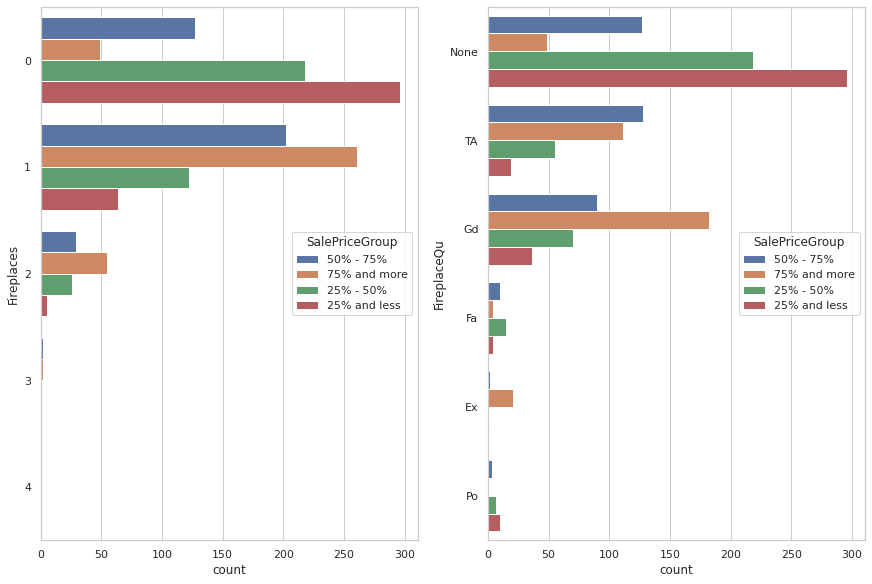

In [112]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='Fireplaces', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='FireplaceQu', hue='SalePriceGroup', ax=ax[1]);

## Pool
<img style="margin-left: 0" src="https://upload.wikimedia.org/wikipedia/commons/9/92/Backyardpool.jpg" width="600px" />

Just a few lots had **pools**. **None** of houses that are cheaper than 25% had pools:

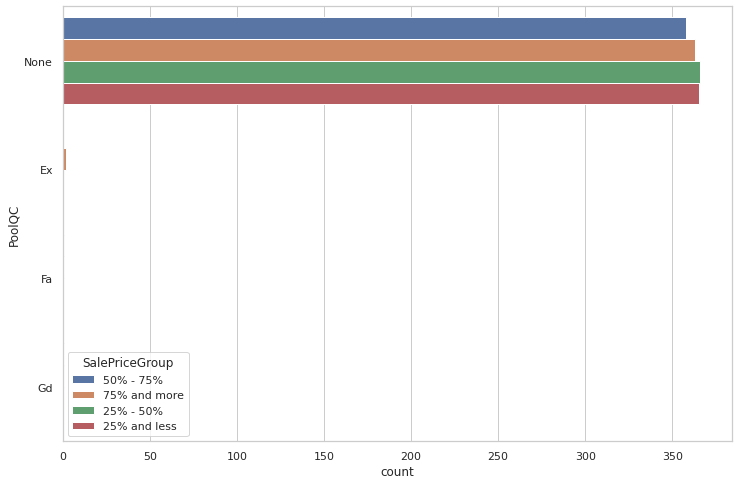

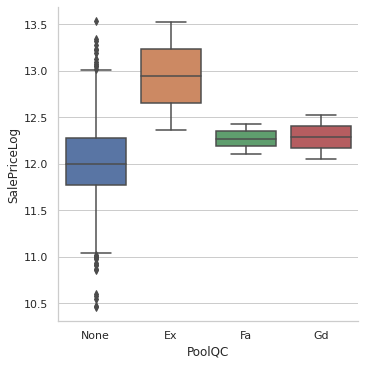

In [113]:
sns.countplot(data=full_df, y='PoolQC', hue='SalePriceGroup')
sns.catplot(data=full_df, x='PoolQC', y='SalePriceLog', kind='box');

There is an outlier with SalePrice < 50% and pool installed:

In [114]:
full_df[(full_df['SalePriceGroup'] == '25% - 50%') & (full_df['PoolQC'] == 'Gd')][[
    'SalePrice',
    'PoolQC',
    'PoolArea',
    'TotRmsAbvGrd',
    'LotArea',
    'GrLivArea',
    'Neighborhood',
]]

Empty DataFrame
Columns: [SalePrice, PoolQC, PoolArea, TotRmsAbvGrd, LotArea, GrLivArea, Neighborhood]
Index: []

## Fence

<img style="margin-left: 0" src="https://irp-cdn.multiscreensite.com/953fb570/dms3rep/multi/fence-installation-repair-services.jpg" width="600px" />

**Expensive houses** (>50%) have good **privacy/wood fences**. **Cheap houses** (<50%) have **minimal privacy/wood fences**.

Good portion of lots did **not have any of fences**:

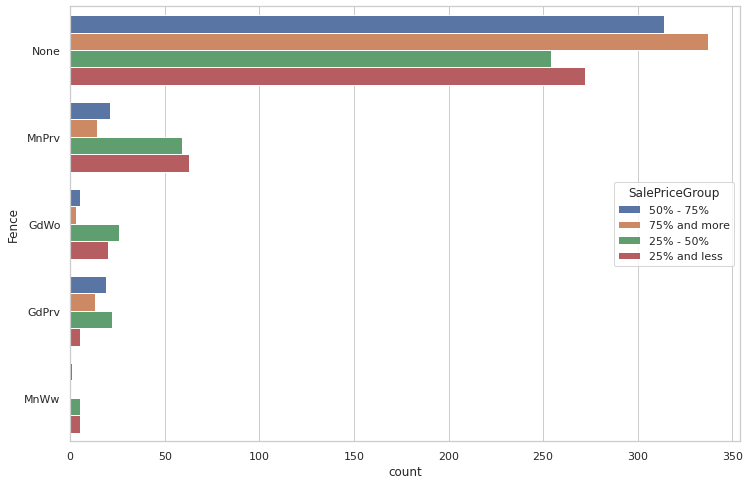

In [115]:
sns.countplot(data=full_df, y="Fence", hue="SalePriceGroup");

## Misc Features

<img style="margin-left: 0" src="https://www.homebase.co.uk/-/media/uk%20images/homebase/ideas%20and%20advice/garden%20and%20outdoor/shed%20garden%20buildings%20and%20storage/how%20to%20build%20a%20shed/h2-build-a-shed-header-image-960x480.jpeg" width="600px" />


Houses might have **additional valuable features** that are described in **MiscX** columns:

- Shed (over 100 $ft^2$, +$500 on avg)

- Second Garage (+$8300 on avg)

- Tenis Court (+$2k on avg)

- Other Features (+$3250 on avg) 

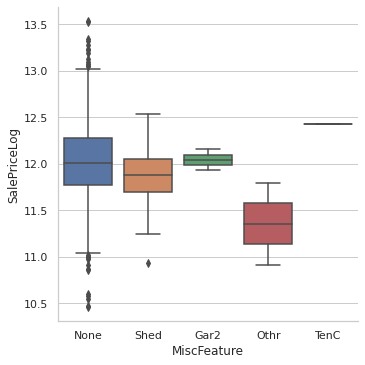

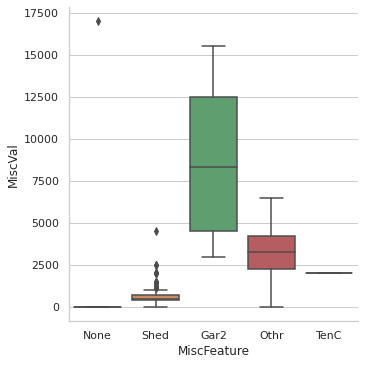

In [116]:
sns.catplot(data=full_df, x='MiscFeature', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='MiscFeature', y='MiscVal', kind='box');

We would like to separate each of the additional features into **new features** that will contain feature value in dollars:

In [117]:
full_df['Shed'] = (full_df['MiscFeature'] == 'Shed') * 1 * full_df['MiscVal']
full_df['2ndGarage'] = (full_df['MiscFeature'] == 'Gar2') * 1 * full_df['MiscVal']
full_df['TenisCourt'] = (full_df['MiscFeature'] == 'TenC') * 1 * full_df['MiscVal']
full_df['OtherFeature'] = (full_df['MiscFeature'] == 'Othr') * 1 * full_df['MiscVal']

Most of the houses **did not have** any **additional features**. Most popular additional feature is a **shed**. 

The rest of the features like second garage, tenis court or other types were in a few lots. This is too rare to let models learn from this information. 

In [118]:
full_df['MiscFeature'].value_counts()

None    2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [119]:
full_df[full_df['MiscFeature'].isin(['Othr', 'Gar2', 'TenC'])][['MiscFeature', 'MiscVal', 'SalePrice', 'SalePriceGroup']]

MiscFeature  MiscVal  SalePrice SalePriceGroup
346         Gar2    15500   151500.0      25% - 50%
705         Othr     3500    55000.0   25% and less
873         Othr        0   133000.0      25% - 50%
1230        Gar2     8300   190000.0      50% - 75%
1386        TenC     2000   250000.0   75% and more
1461        Gar2    12500        NaN           None
2073        Othr     6500        NaN           None
2194        Gar2     3000        NaN           None
2697        Othr     3000        NaN           None
2790        Gar2     4500        NaN           None

## Sale Information

<img style="margin-left: 0" src="https://www.efficy.com/wp-content/uploads/2020/02/Sales-negociation-closing-900x412.jpg" width="600px" />

**Sale type and condition** could adjust the **SalePrice**. In overall, our dataset holds information about **5 years** of house sale activities (2006 - 2010):

In [120]:
full_df['YrSold'].unique()

array(['2008', '2007', '2006', '2009', '2010'], dtype=object)

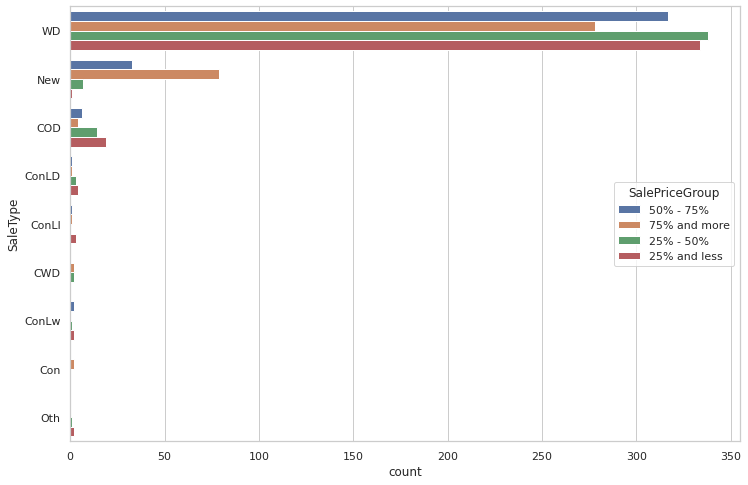

In [121]:
sns.countplot(data=full_df, y='SaleType', hue='SalePriceGroup');

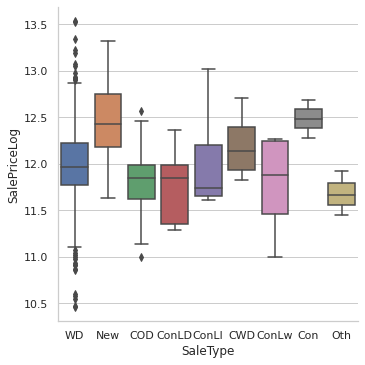

In [122]:
sns.catplot(data=full_df, x='SaleType', y='SalePriceLog', kind='box');

**Sale Type** is a way how house was bought and rights on property was transfered.

There are three types of sales:

- A **warranty deed** is a document used in real estate that provides the greatest amount of protection to the purchaser of a property. It warrants that the owner owns the property free and clear of any outstanding liens, mortgages, or other encumbrances against it. With warranty deeds, there are three ways on how sale price could be paid:
    - **Conventinal mortgage** - is any type of home buyer’s loan that is not offered or secured by a government entity. Instead, conventional mortgages are available through private lenders, such as banks, credit unions, and mortgage companies.
    - **VA Loan** - is a mortgage loan in the United States guaranteed by the United States Department of Veterans Affairs (VA)
    - **Cash**

- A **land contract** can also be called a contract for deed or agreement for deed and works similarly to a note and mortgage. However, instead of the buyer gaining title to the property, the seller remains on title until the debt is repaid in full. Contacts could the following types:
    - 15% down payment and regular intrest rate
    - Low down payment and low intrest rate
    - Low intrested rate/Low Down payment

- **Court Officer Deed** - is used only by court appointed or supervised fiduciaries, such as executors, administrators, conservators, and trustees, and may have fewer warranties than the general warranty deed.
- **Other types**

There is also "**home just constructed and sold**" sale type. However, this doesn't seem to tell us much about a sale contract, but it's definitelly correlates with **SalePrice**. This types of houses had higher price as every brand new/unused thing.

More Info:
- https://www.investopedia.com/terms/w/warranty-deed.asp
- https://www.investopedia.com/terms/c/conventionalmortgage.asp
- https://en.wikipedia.org/wiki/VA_loan
- https://danilsonlaw.com/five-kinds-property-deeds-need-know/
- https://www.thebalance.com/choosing-a-down-payment-315602
- https://www.investopedia.com/terms/d/down_payment.asp

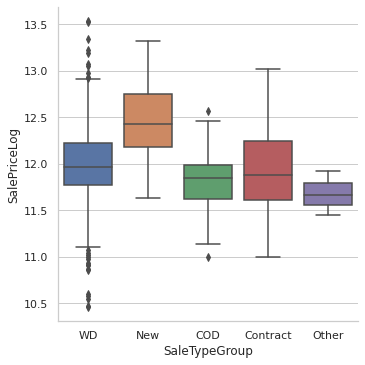

In [123]:
full_df['SaleTypeGroup'] = full_df['SaleType'].map({
    'WD': 'WD',
    'CWD': 'WD',
    'New': 'New',
    'COD': 'COD',
    'Con': 'Contract',
    'ConLD': 'Contract',
    'ConLw': 'Contract',
    'ConLI': 'Contract',
    'Oth': 'Other'
})

sns.catplot(data=full_df, x='SaleTypeGroup', y='SalePriceLog', kind='box');

Let's see how **SalePrice** oscillated during given five years:

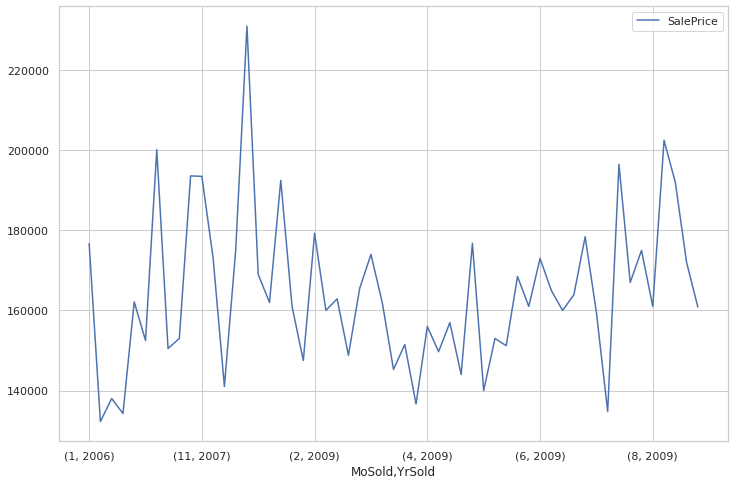

In [124]:
full_df.groupby(['MoSold', 'YrSold'])[['SalePrice']].median().plot();

Dataset sale history touched the **Great Recession** (2007 - 2009). During that time, median **SalePrice** went down and started to go up in the end of 2009 and beginning of 2010. 

So **YrSold** was suppose to impact **SalePrice**.

It doesn't seem like **YrSold** and **MoSold** are sources of **SalePrice** leakage. There is a **little correlation** between them according to the correlation heatmap. This is true that we would not have this information if we had ran a model in production. Even so, we still could use the current month and year to predict sale price of the house with an assumption that it might be bought this month/year. 

Since **YrSold** feature seems to be usefull, let's check any price changes taking into account house purchase season:

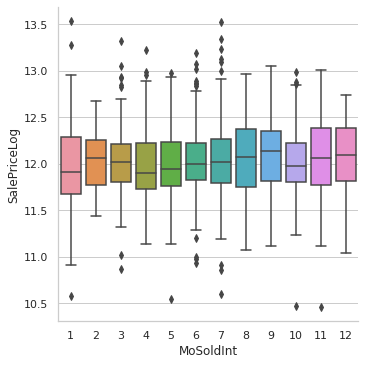

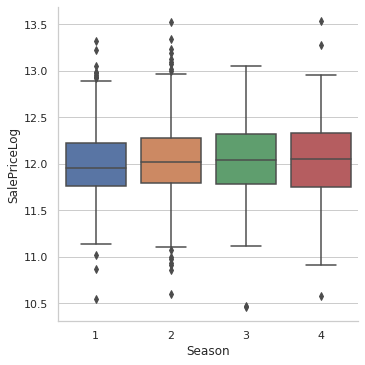

In [125]:
dataframe['MoSoldInt'] = dataframe['MoSold'].astype(int)

full_df['Season'] = full_df['MoSold'].map({
    '12': 4, '1': 4, '2': 4,
    '3': 1, '4': 1, '5': 1, 
    '6': 2, '7': 2, '8': 2, 
    '9': 3, '10': 3, '11': 3,
})

sns.catplot(data=full_df, x='MoSoldInt', y='SalePriceLog', kind='box')
sns.catplot(data=full_df, x='Season', y='SalePriceLog', kind='box');

**SalePrices** were collected along 5 year period. This means that they most likely were affected by inflation/year demand as well. This may matter for us, because theoretically similar houses could have been sold with a different price (depending on **YrSold**). 

As a simple solution, we can assume all price changes with respect to baseline year (like 2006): 

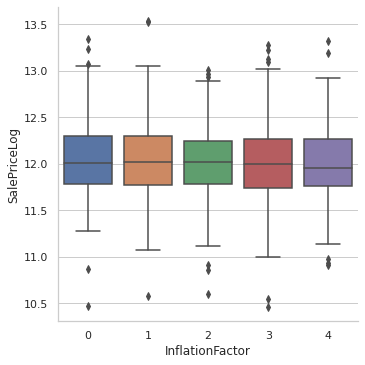

In [126]:
full_df['InflationFactor'] = full_df['YrSold'].astype(int) - 2006

sns.catplot(data=full_df, x='InflationFactor', y='SalePriceLog', kind='box');

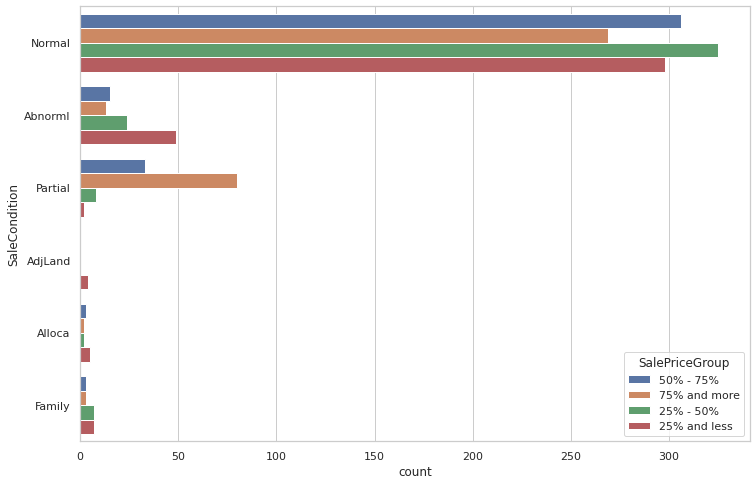

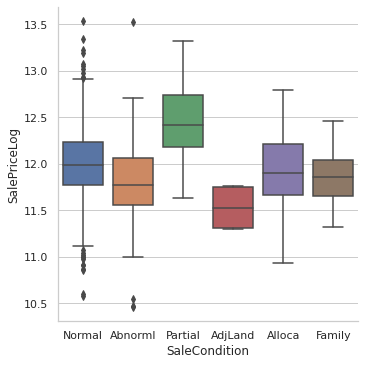

In [127]:
sns.countplot(data=full_df, y='SaleCondition', hue='SalePriceGroup')
sns.catplot(data=full_df, x='SaleCondition', y='SalePriceLog', kind='box');

Let's try to interact **SaleType** and **SaleCondition**:

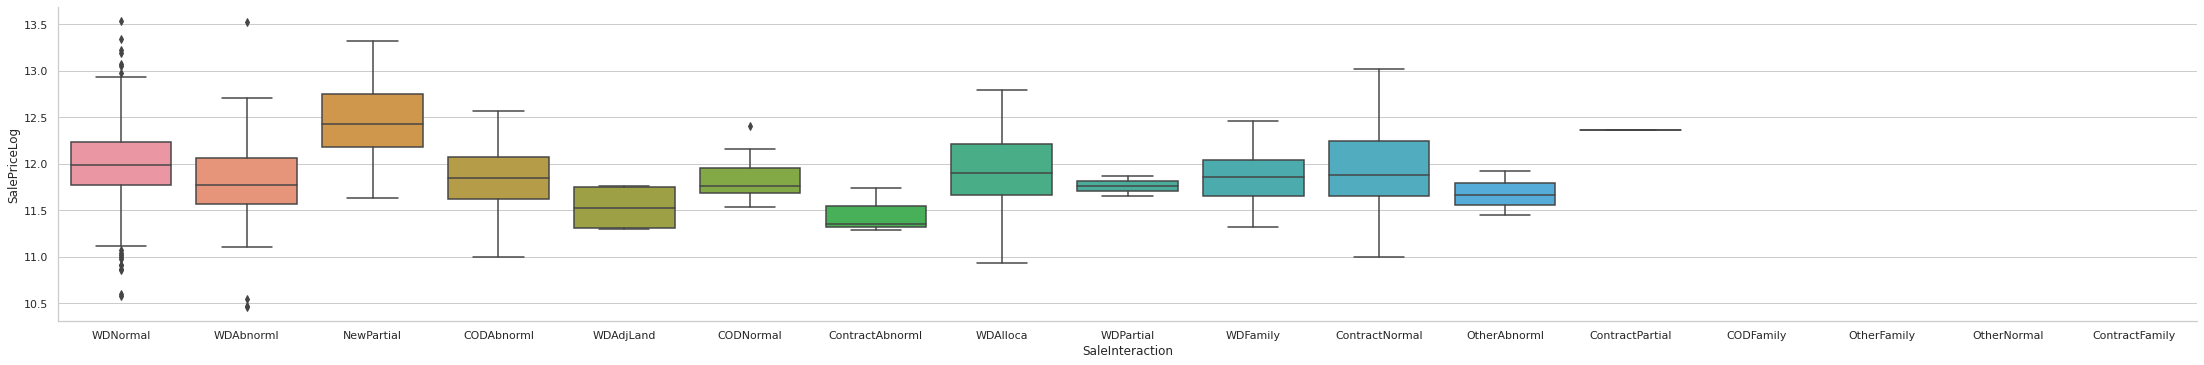

In [128]:
full_df['SaleInteraction'] = full_df['SaleTypeGroup'] + full_df['SaleCondition']

g = sns.catplot(data=full_df, x='SaleInteraction', y='SalePriceLog', kind='box')
g.fig.set_figwidth(40)

**New houses** were bought when they were **partially complete**.

# Feature Correlations

Let's have an overview of feature correlations and importance (and specifically correlations with SalePrice):

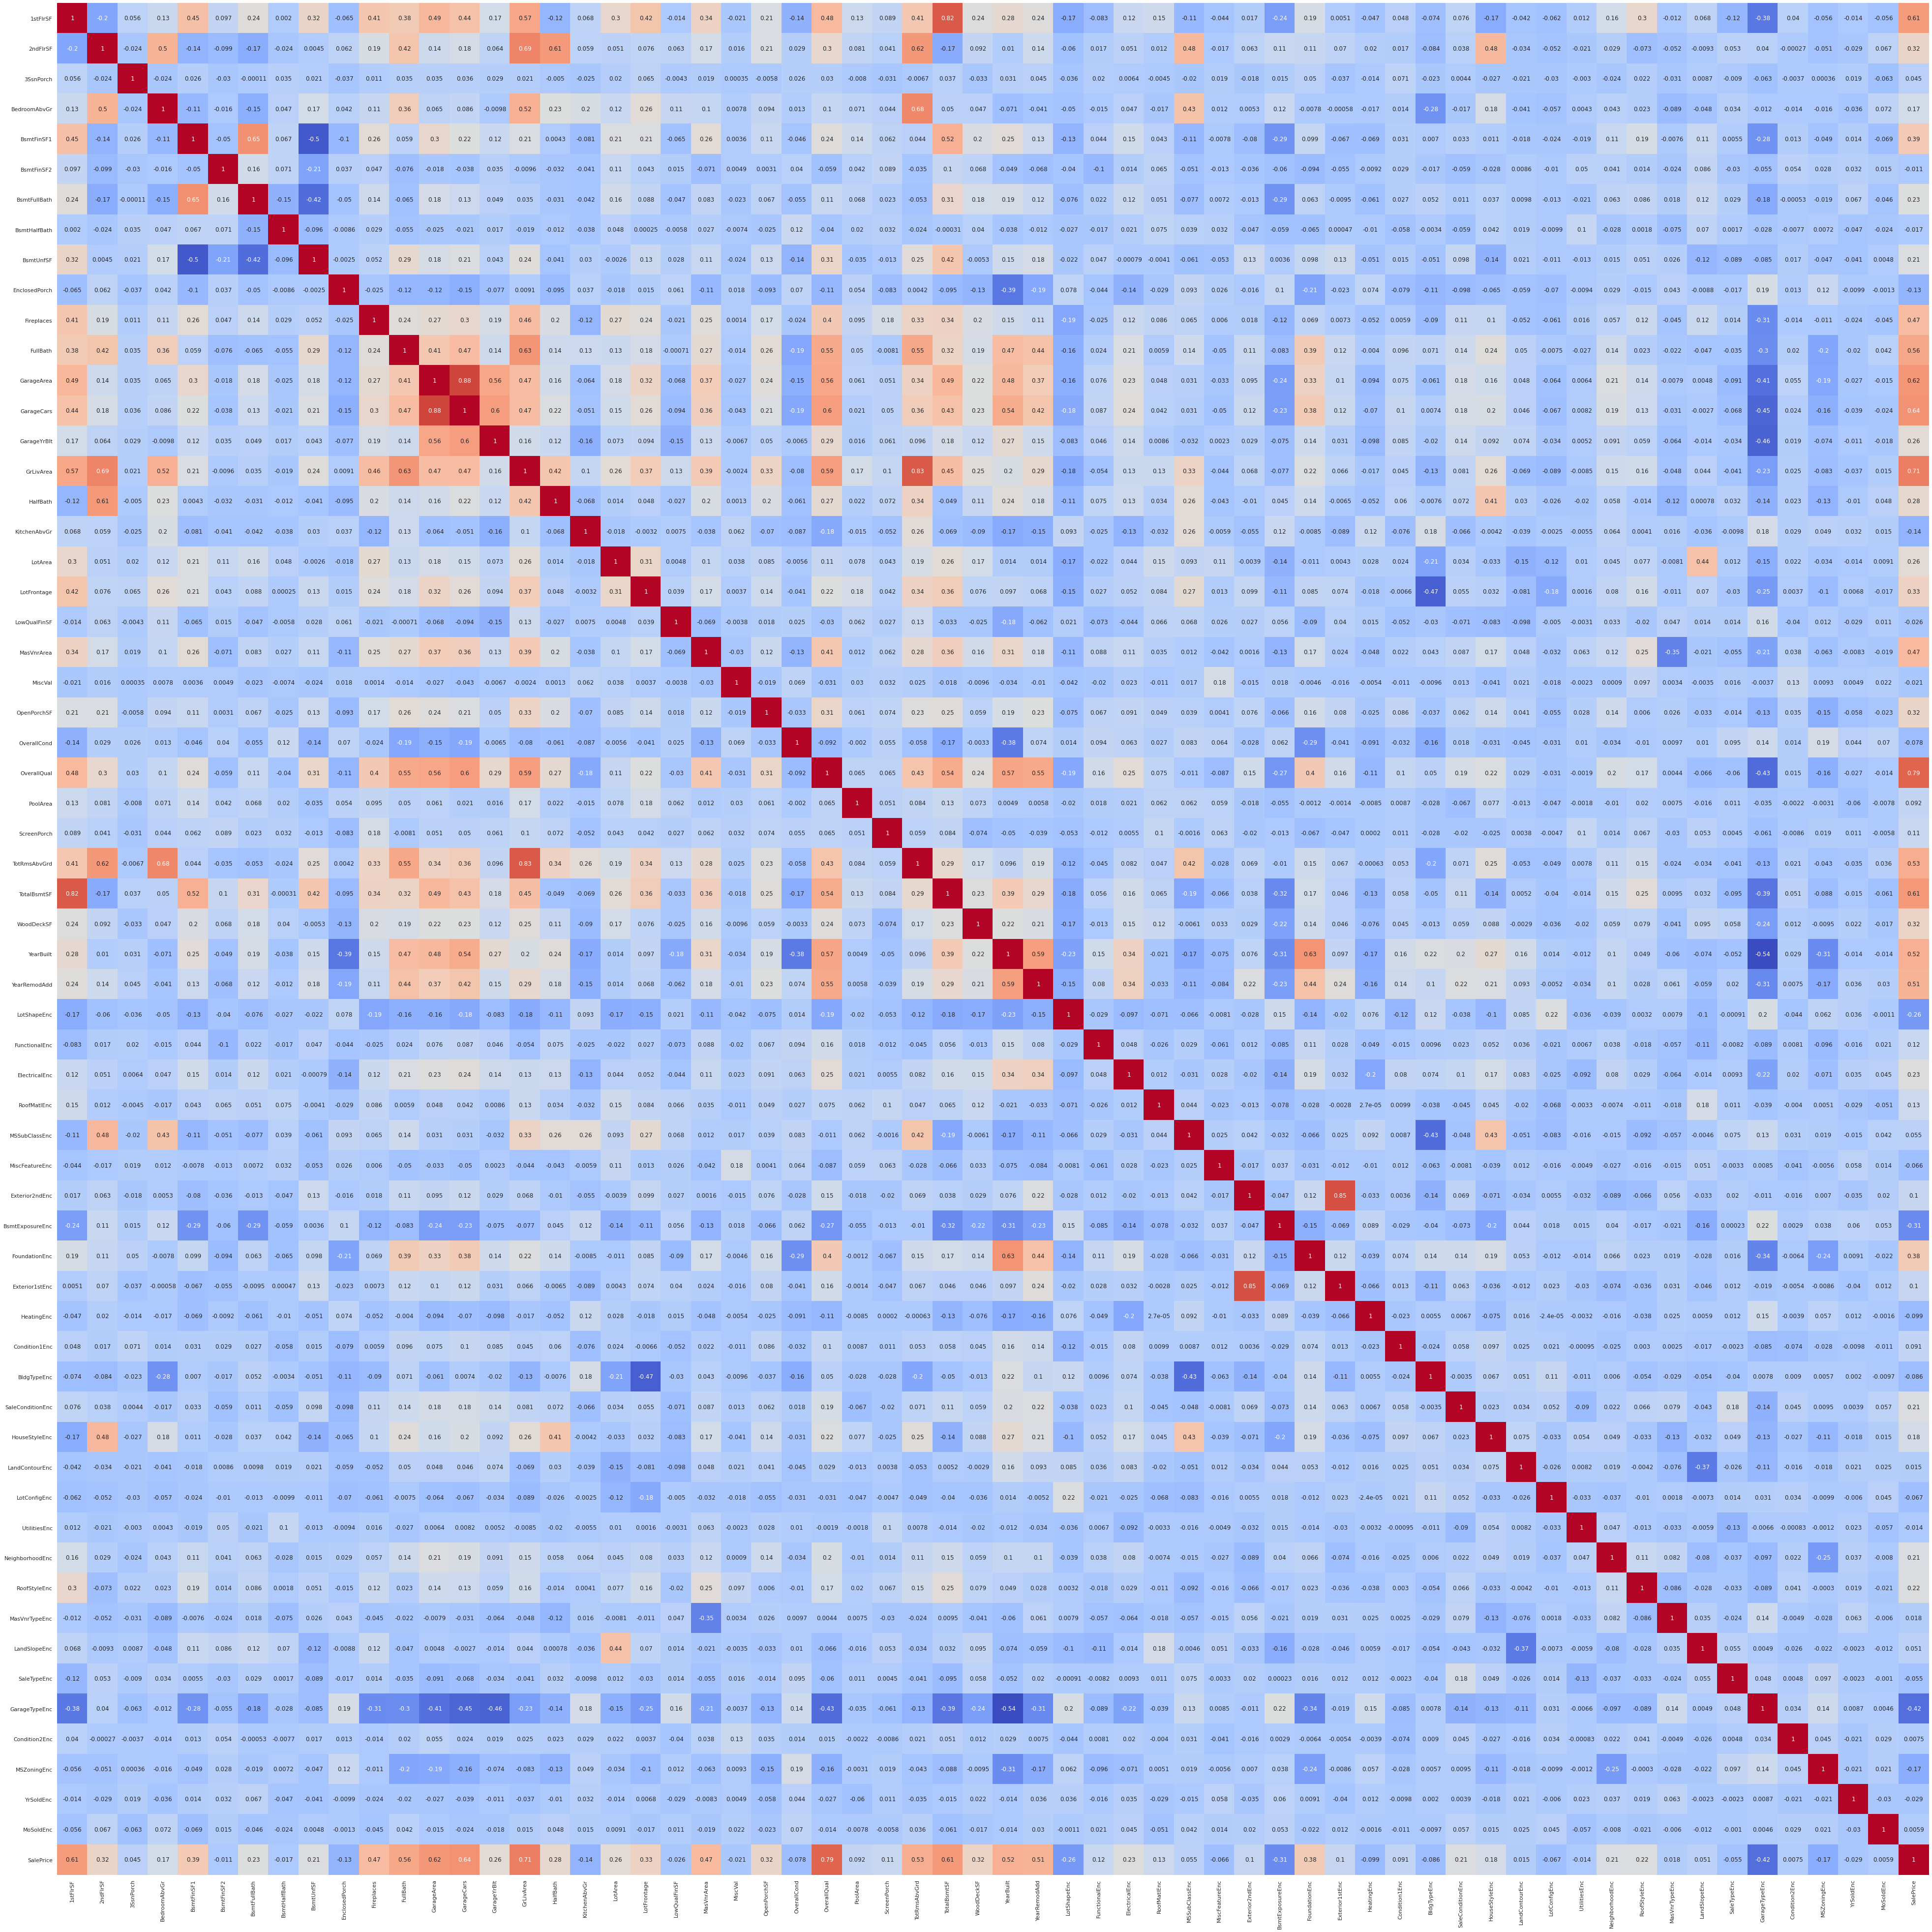

In [129]:
corr_features = num_features + enc_cat_features

plt.figure(figsize=(80, 70))
sns.heatmap(train_df[corr_features + ['SalePrice']].corr(), annot=True, square=True, cmap='coolwarm', cbar=False);

In [130]:
features = num_features + enc_cat_features

Lasso Selector Results:

In [131]:
from sklearn.linear_model import LassoCV

l1_regressor = LassoCV(
    alphas=[0.1, 0.2, 0.4, 0.6, 0.8, 1],
    n_jobs=-1,
    random_state=42,
)

l1_selector = SelectFromModel(l1_regressor, max_features=30)
l1_selector.fit(train_df[features], train_df['SalePrice'])

temp_X = l1_selector.transform(train_df[features])

selected_features = pd.DataFrame(l1_selector.inverse_transform(temp_X), 
                                 index=train_df[features].index,
                                 columns=train_df[features].columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507077278547.12976, tolerance: 759214014.2531197
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459349153482.2012, tolerance: 699031751.5199751
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459308184327.91956, tolerance: 699031751.5199751
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to incr

Index(['BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces',
       'FullBath', 'GarageCars', 'KitchenAbvGr', 'OverallCond', 'OverallQual',
       'TotRmsAbvGrd', 'LotShapeEnc', 'FunctionalEnc', 'ElectricalEnc',
       'RoofMatlEnc', 'MiscFeatureEnc', 'BsmtExposureEnc', 'FoundationEnc',
       'Exterior1stEnc', 'HeatingEnc', 'BldgTypeEnc', 'SaleConditionEnc',
       'HouseStyleEnc', 'LandContourEnc', 'UtilitiesEnc', 'RoofStyleEnc',
       'MasVnrTypeEnc', 'LandSlopeEnc', 'GarageTypeEnc', 'Condition2Enc',
       'MSZoningEnc'],
      dtype='object')

Random Forest Selector Results:

In [132]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(
    max_depth=15,
    n_estimators=1000,
)

rf_selector = SelectFromModel(random_forest_regressor, max_features=30)
rf_selector.fit(train_df[features], train_df['SalePrice'])

temp_X = rf_selector.transform(train_df[features])

selected_features = pd.DataFrame(rf_selector.inverse_transform(temp_X), 
                                 index=train_df[features].index,
                                 columns=train_df[features].columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'GarageCars', 'GrLivArea',
       'OverallQual', 'TotalBsmtSF'],
      dtype='object')

Spearman Correlation Results:

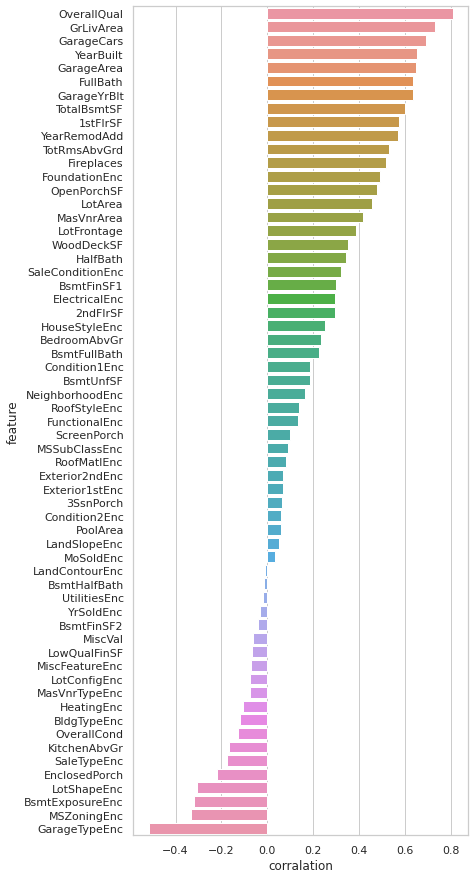

In [133]:
price_corr_df = pd.DataFrame()
price_corr_df['feature'] = corr_features
price_corr_df['corralation'] = [train_df[feature].corr(train_df['SalePrice'], 'spearman') for feature in corr_features]
price_corr_df.sort_values('corralation', ascending=[0], inplace=True)

plt.figure(figsize=(6, 0.25 * len(features)))
sns.barplot(data=price_corr_df, x='corralation', y='feature', orient='h');

# Summary

In this notebook, we tried to understand what defined a sale price in Ames house dataset. We reviewed all house features and dug into real estate domain as well as engineered new features along the way.

In the second part, we will be modeling sale price regression based on insights from this analysis 🧪

If you find this notebook useful, feel free to upvote it 🙌
If you know how to improve this analysis and what I coult miss, please share you thoughts in comments 🎤 

<strong>Github Repo:</strong> https://github.com/roma-glushko/kaggle-house-prices

## References
- https://www.kaggle.com/humananalog/xgboost-lasso